<img style="float: right;margin:0 10px 10px 0" src="screenshots/cdrc_logo.png" width=180>

# GEOG5995M Programming for Social Science: Core Skills <a class="tocSkip">
<br>


<img style="float: right;margin:0 10px 10px 0" src="screenshots/LIDA-logo.png" width=180><a class="tocSkip">
* #### Contact: F.L.Pontin@leeds.ac.uk <a class="tocSkip">



<b>9:30-12.00:</b> Data Visualisation. 
- Why visualise data?
- Different visualisations
- Matplotlib and Seaborn
- Grammar of graphics
- Editing graphics

<b>12.00-13:00:</b> Lunch


<b>13:00-15:30 </b>
Statistical analysis and modelling

- Time series data
- OLS regression
- Generalised linear models (for count outcomes)

<b>15.30: Finish day 2</b>

### Let's import the packages we need for today's exercise and read in the files we are going to visualise and analyse

Typically when you are writting a notebook or py file you import all the apckages you need at the start this 
- A) means someone can quickly see the apckages you ahve sued to do your analysis
- B) you can insure all the packages you need are installed before you get coding.

#### Import packages

In [2]:
# Import required packages 

# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# for data manipulation
import pandas as pd
import numpy as np

# for statistical modelling/ machine learning

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot


In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Load in data

In [3]:
# load the titanic example dataset and save it as a dataframe named titanic
titanic = sns.load_dataset('titanic')



<div class="alert alert-block alert-info">
    
<I> A Quick description of the titanic data variables:
- <b>survival:</b>    If the passenger survived
- <b>PassengerId:</b> Unique Id of a passenger. 
- <b>pclass:</b>    Ticket class
- <b>sex:</b>   Sex     
- <b>Age:</b>   Age in years     
- <b>sibsp:</b>    Number of siblings / spouses aboard the Titanic     
- <b>parch:</b>   Number of parents / children aboard the Titanic     
- <b>ticket:</b>   Ticket number     
- <b>fare:</b>   Cost of the passenger fare     
- <b>cabin:</b>  Cabin number     
- <b>embarked:</b>    Port of Embarkation</I> 

# Visualising data

- <font color =grey> Why visualise data? </font>
- Different visualisations
- Matplotlib and Seaborn
- <font color =grey> Grammar of graphics </font>
- Editing graphics

### <i> Often the best way to understand the data you have is to visualise it <a class="tocSkip"> </i>

In this exercise we are going to be introducing you to a lot of different data visualisations. For each data visulasiaiton function we have sign-posted you to the documentation. Once you have run through the data visualsiation code go back and look at the other editable parameteres in the documentation and try adding them to your visualisations. Have a think about whether changing one of these might improve the clarity or interpretability of your data visualisation. 

## Histograms
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

*'A histogram is a graph that shows the frequency of numerical data using rectangles. The height of a rectangle (the vertical axis) represents the distribution frequency of a variable (the amount, or how often that variable appears).'* 

You could plot two histograms to see the distribution of data before and after cleaning.

<br>The simplest way to do this is using the matplotlib <code>.hist()</code> function.
<br> <font color='orchid'> <b>Run the two cells below</b></font>

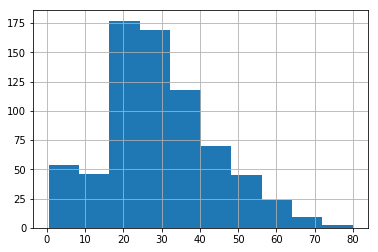

In [4]:
titanic['age'].hist()

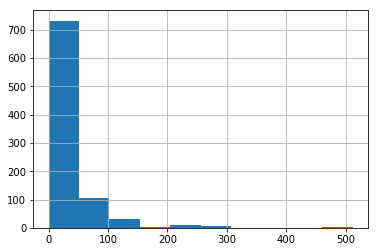

In [5]:
titanic['fare'].hist()

Use <code>bins =</code> within the <code>.hist()</code> function. Bins defines the number of equal-width bins in the range (the number of bars in the histogram)

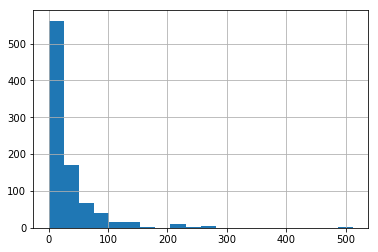

In [8]:
# copy the code above and experiment with the number of bins
titanic['fare'].hist(bins=20)


<div class="alert alert-block alert-info">
<b>Tip:</b> <br>The <code>;</code> is used after coding a visualisation to supress the text output that is also created. <br> When you next create a visualisation try running the code with and without the <code>;</code> . <br>
    
<code>;</code> can also be used to supress other outputs. E.g. Whilst <code>titanic.head()</code> shows you the first 5 lines of the titanic dataframe. <code>titanic.head();</code> would not produce an output.
</div>

## Scatterplots and correlations

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Use the matplotlib pyplot <code>.scatter()</code> function to create a scatter plot. 
<br>Whilst a histogram is 1 dimensional (takes one set of data), scatter plots plot two lots of data (often columns) against each other.

We will use the scatter plot to see if there is a correlation between age and fare, specifying age as the x-axis variable and price as the y-axis variable 
<br> <font color='orchid'> <b>Run the code below</b></font>

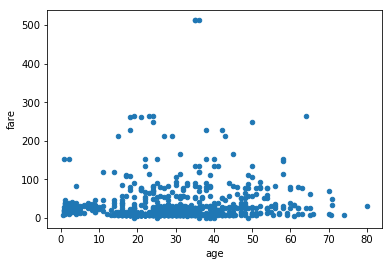

In [9]:
titanic.plot.scatter(x='age',y='fare');

## Customising graphs

There are lots of different ways to edit matplotlib graphs to get them looking how you want

- <code>s=</code>: scalar i.e. point size 
- <code>c=</code>: colour of the points, see the list of matplotlib colours below. colours need to be in speech marks e.g.<code>"red"</code>
<img src= "screenshots/colors.png" width =700 >
- <code>alpha=</code>: How transparent the point is, 0-1 (completely transparent- solid colour)
- <code>marker=</code>: Defines how the point looks, there are a few examples below and more [here](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)
<img src= "Intro_to_Python\marker.png" width =500 >

<br> <font color='orchid'> <b>Play around with the code below, changing different elements</b></font>

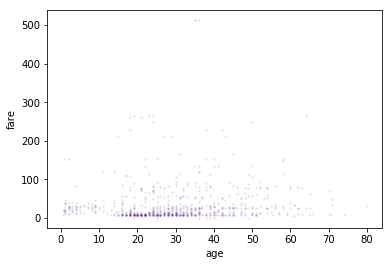

In [12]:
titanic.plot.scatter(x='age',y='fare', s=2, c='rebeccapurple', alpha=0.1);

<br> <font color='orchid'> <b>Plot your own scatter plot of age against fare with pink triangular points, scalar = 75 and make the points semi-transparent</b></font>

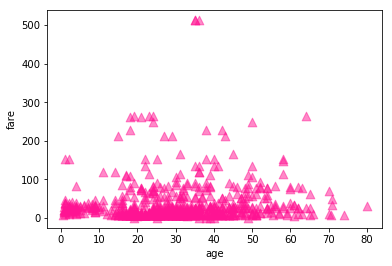

In [13]:
# scatter plot age v. fare, semi-transparent pink triangular points, scalar = 75, 
titanic.plot.scatter(x='age',y='fare', s=75, c='deeppink', alpha=0.5, marker = "^");

## Visulisations using Seaborn
The seaborn package can also be used to visulise data. Often producing cleaner and clearer looking plots along with statistical graphics. <br>

https://seaborn.pydata.org/generated/seaborn.displot.html <br>

### Plotting data distribution
<code>sns.displot()</code> is similar to <code>.hist() </code> but from the seaborn package
<br><font color= "orchid"><b> Run the code bellow </font>

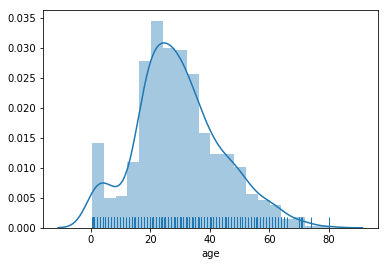

In [18]:
sns.distplot(titanic['age'].dropna(), rug=True)

Try adding <code>kind = 'hist'</code>,<code>kind = 'hist'</code> and <code>kind = 'ecdf'</code> in turn to the <code>sns.displot()</code> function

In [22]:
# uncomment the code and experiment with the kind= 

sns.distplot(titanic['age'].dropna(), kind = "ecdf")

TypeError: distplot() got an unexpected keyword argument 'kind'

### Plotting bivariate (numeric) data - joint plot

<code>sns.jointplot()</code> is used to plot two variable with seaborn. Notice it also produces a histogram of the variable distributions of each axis.

Like with matplotlib elements of the graph are editable

<code>kind=</code> : Can be “scatter” (default) | “reg” | “resid” | “kde” | “hex” 

#### Scatter plots

Creates a scatter plot with histograms for each variable on the x (age) and y (fare) axis respectively
<br><font color= "orchid"><b> Run the code bellow and then try changing the kind of graph plotted </font>

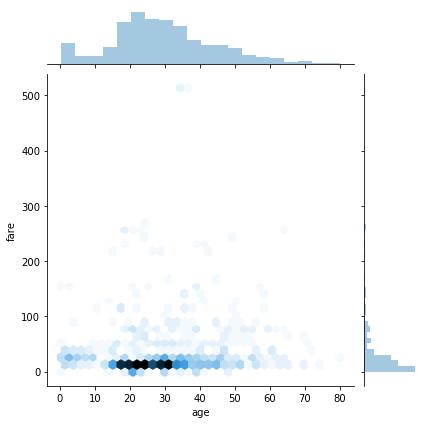

In [28]:
sns.jointplot(x='age',y='fare', kind ='hex',data=titanic);

#### Kernel density estimates (KDE)
Plots a bivariate kernel density estimate with univariate kernel density estimate on each axis

<br><font color= "orchid"><b> Copy and change the original jointplot code to produce a kde plot </font>

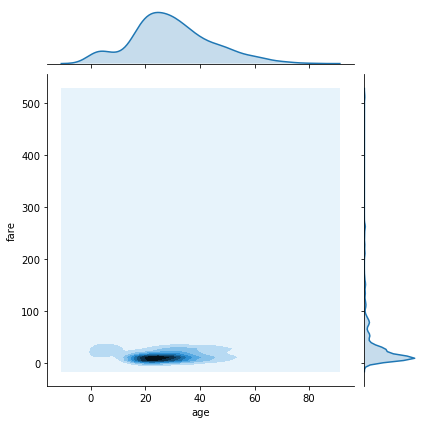

In [29]:
# plot a kde plot
sns.jointplot(x='age',y='fare', kind ='kde',data=titanic);

#### Regression plots

Adds a linear regression fit to the scatter plot. 
Univariate KDE curves on axis. 

<br><font color= "orchid"><b> Copy and change the original jointplot code to produce a regression plot </font>

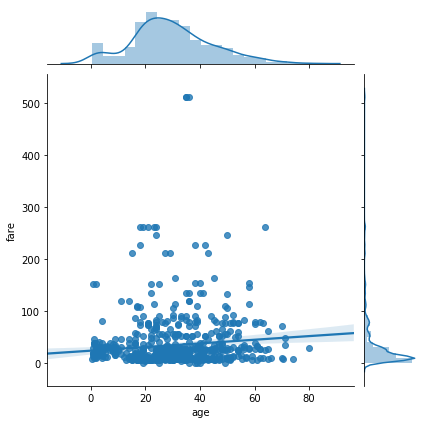

In [30]:
# plot a reg plot
sns.jointplot(x='age',y='fare', kind ='reg',data=titanic);

#### Hexbin plots

"Hexbin plots take in lists of X and Y values and returns what looks somewhat similar to a scatter plot, but where the entire graphing space has been divided into hexagons (like a honeycomb) and all points have been grouped into their respective hexagonal regions with a color gradient indicating the density (or mean Z values) of each hexagonal area."

##### Why not just use a scatterplot?

Hexbins are particularly useful if you have a lot of data or lots of overlapping points as they give a good visualisation of point density. 


Explanation source and full article: https://medium.com/@mattheweparker/visualizing-data-with-hexbins-in-python-39823f89525e

<br><font color= "orchid"><b> Copy and change the original jointplot code to produce a hexbin plot </font>

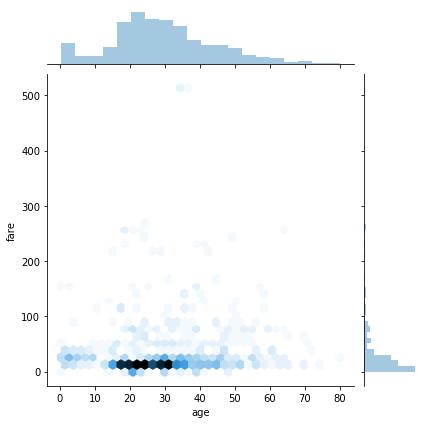

In [31]:
# plot a hex plot
sns.jointplot(x='age',y='fare', kind ='hex',data=titanic);

#### Residuals plot
Plots the residuals of a linear regression.

Residual plots are used to evaluate regression models, I have included them for reference as some of you may already produce them using other software. However  don't worry if you don't recognise then (we are not covering stats. theory here).

If you would like to learn more about residuals this article gives a good explanation: https://www.statisticshowto.com/residual-plot/

<br><font color= "orchid"><b> Copy and change the original jointplot code to produce a residuals plot </font>

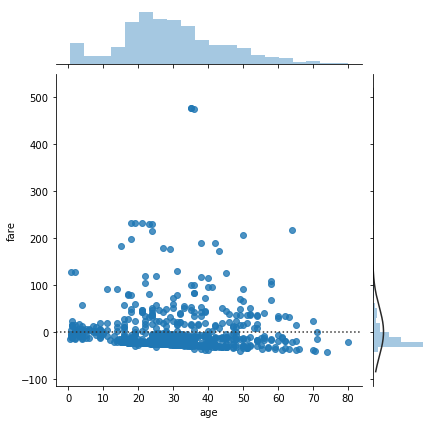

In [33]:
# plot a residuals plot
sns.jointplot(x='age',y='fare', kind ='resid',data=titanic);

<div class="alert alert-block alert-info"> <b>NOTE</b> If you are getting a red box with warning messaged about depricated packages, uncomment and run the code below </div>

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

### Different editable parameters with Seaborn
To edit the seaborn plot, the parameters you specify are slightly different to matplotlib.

You will notice with seaborn that the <code>x</code> and <code>y</code> specify only the column name and <code>data</code> is used to specify the dataframe where the <code>x</code>&<code>y</code> columns can be found.

#### Other editable parameters:
- <code>color=</code> colour of the points, see the list of matplotlib colours. Colours need to be in speech marks e.g.<code>"red"</code> 
<br>Note the American spelling, using 'colour' will produce an error
- <code>height=</code> Size of the figure (it will be square), enter a numerical value.
- <code>marker=</code> Same as matplotlib


Read more about the editable parameters in the [seaborn jointplot documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
<br> <font color='orchid'> <b>Play arround with the code below, changing different elements</b></font>

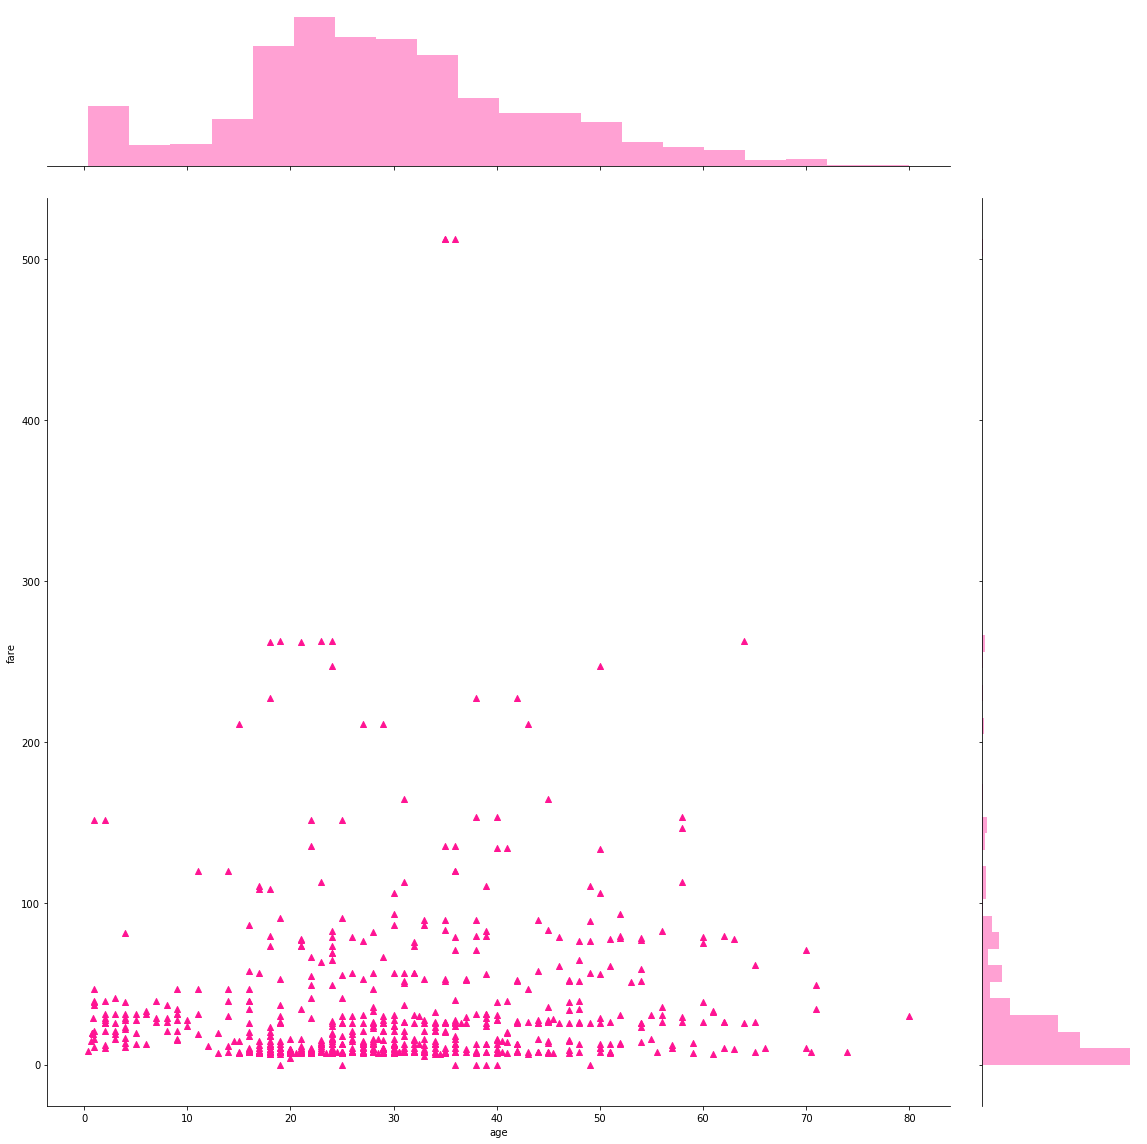

In [36]:
sns.jointplot(x='age',y='fare', color='deeppink', kind ='scatter',data=titanic,
             height=16, marker='^');

### JointGrid
Now you have created a few different plots have a look at the JointGrid documentation, to combine multiple plots into 1 figure (useful for academic publications) <br>

https://seaborn.pydata.org/generated/seaborn.JointGrid.html 

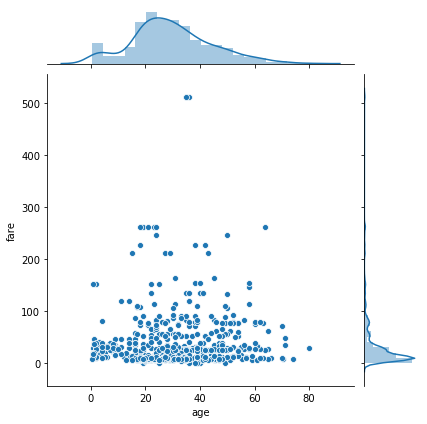

In [41]:
## Write some code using the JointGrid funciton here

g = sns.JointGrid(data=titanic, x="age", y="fare")
g.plot(sns.scatterplot, sns.distplot)

## Plotting categorical data
### Bar chart

We are going to use seaborne.catplot; this is a visulisation which can handle categorical data.

We are going to plot the column 'coffee_shop;, as each row is a unique type of coffee by counting the number of times the coffee shop name occurs that tells us how many coffees they sell.


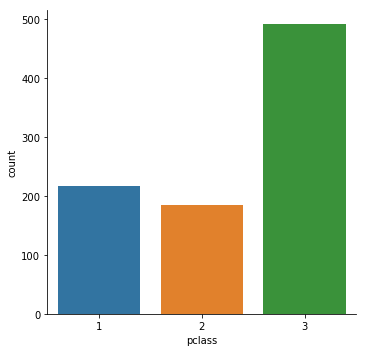

In [42]:
sns.catplot(x='pclass', data=titanic, kind='count')

 Now produce a count plot for column 'embark_town'
<font color='orchid'> <b>Write your own code in the cell bellow</b></font>

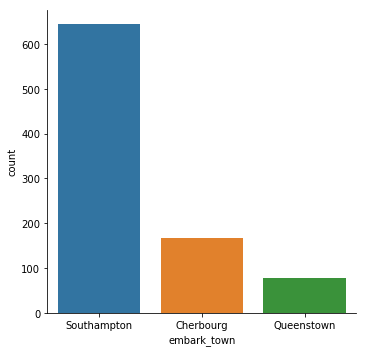

In [43]:
# write code here
sns.catplot(x='embark_town', data=titanic, kind='count')

This is what you should see <img src= "screenshots/embark_count.png" width =400 >

### Box plot

Visualises the summary statistics of the data: mean/median and interquartile ranges

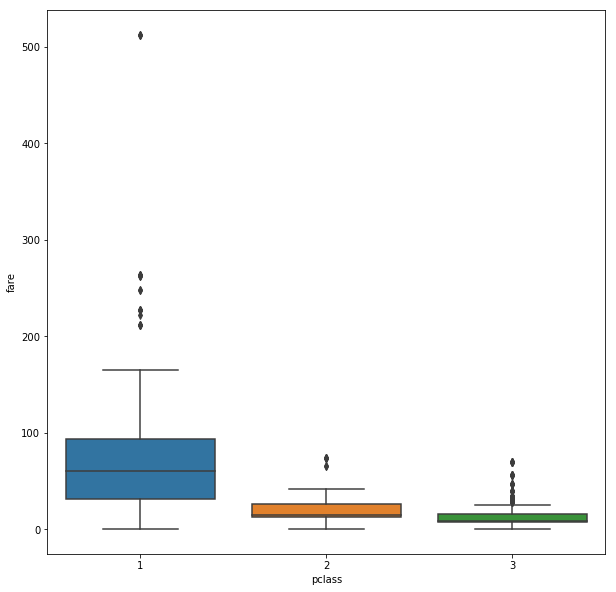

In [44]:
# plot a boxplot of fare by the passenger class
plt.figure(figsize=(10,10))
sns.boxplot(x='pclass', y='fare', data=titanic);

### Violin plot
Also visualises the summary statisitcs of the data, but often prefered over a box plot as they also show the distribution of the data

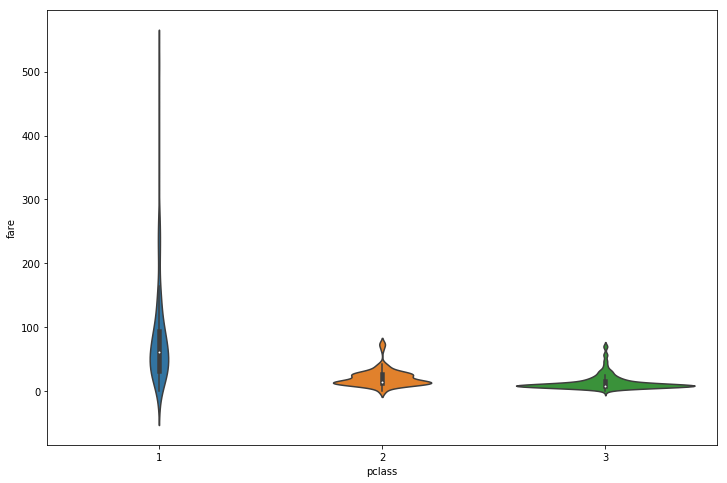

In [45]:
plt.figure(figsize=(12,8))
sns.violinplot(x='pclass', y='fare', data=titanic);

You can edit the violin plot to show a third variable, using the <code>hue</code> parameter. 
<br>Adding <code>hue='sex'</code> will produce a violinplot for fare by class for male and females.

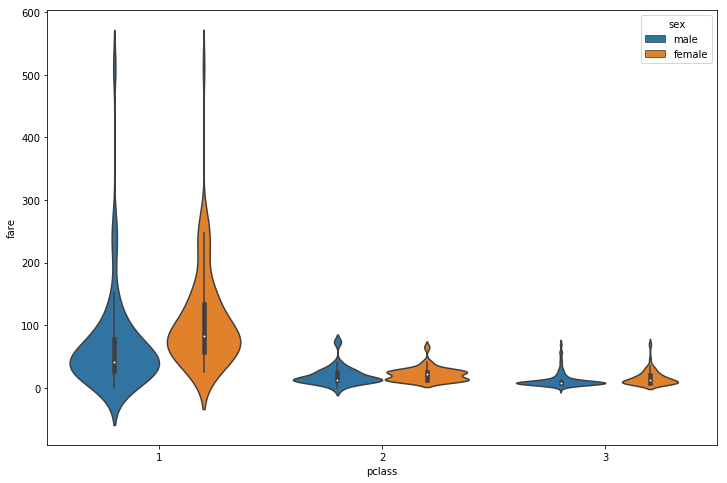

In [46]:
# Visualise the distirbution and summary stats. of fare price for each passeneger class, by sex.

# define plot size
plt.figure(figsize=(12,8))
# plot
sns.violinplot(x='pclass', y='fare',  hue='sex', data=titanic);

Try adding the code <code> split=True, </code> to the graph specifications above. What happens?

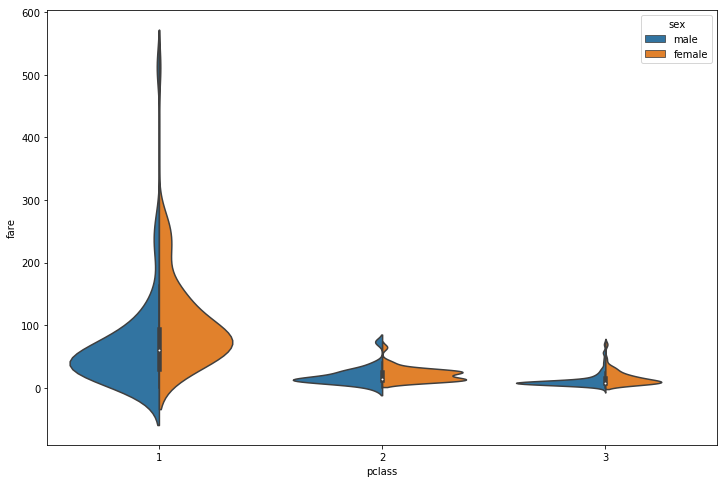

In [47]:
# Visualise the distirbution and summary stats. of fare price for each passeneger class, by sex.
# add split=True
# define plot size
plt.figure(figsize=(12,8))
# plot
sns.violinplot(x='pclass', y='fare',  hue='sex', data=titanic, split = 'true');


### Categorical plot: the realtionship between a categorical and numerical variable

<code>sns.catplot.()</code> by default plots a  'stripplot': a scatterplot where one variable is categorical.








<font color='orchid'> <b>Plot the fare price by class</font>

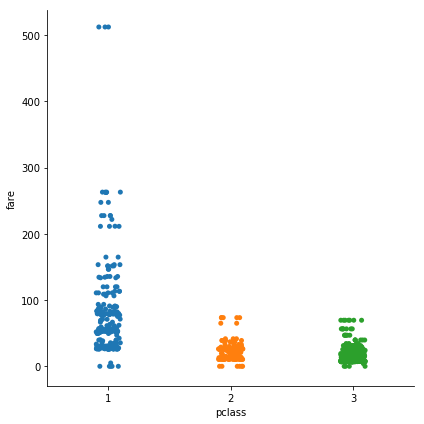

In [48]:
sns.catplot(x='pclass', y='fare', data=titanic, height=6, dodge=True);

<font color='orchid'> <b>Plot the fair paid by each passenger by class and colour the points based on the sex of the passenger </font>


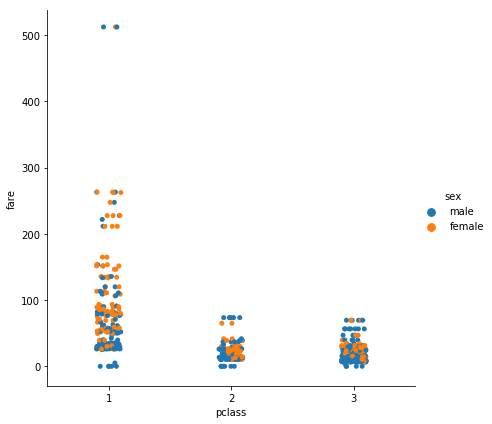

In [49]:
sns.catplot(x='pclass', y='fare',  hue='sex', height=6,data=titanic,);

<font color='orchid'> <b>Plot the age of passenger (y axis) by sex (x axis) and colour the points based on whether they were traveling alone </font>


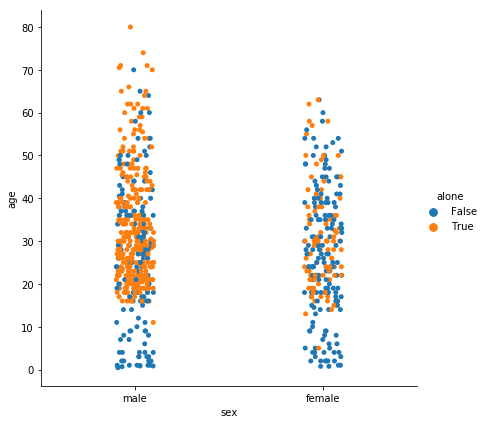

In [55]:
sns.catplot(x='sex', y='age',  hue='alone', height=6,data=titanic,);


It should look like this:
<img src= "screenshots/sex_age_alone_vis.png" width =500 >

You cna even plot a forth variable by specifying <code>col= 'varaible_name',</code> to plot seperate plots for each category. E.g.:

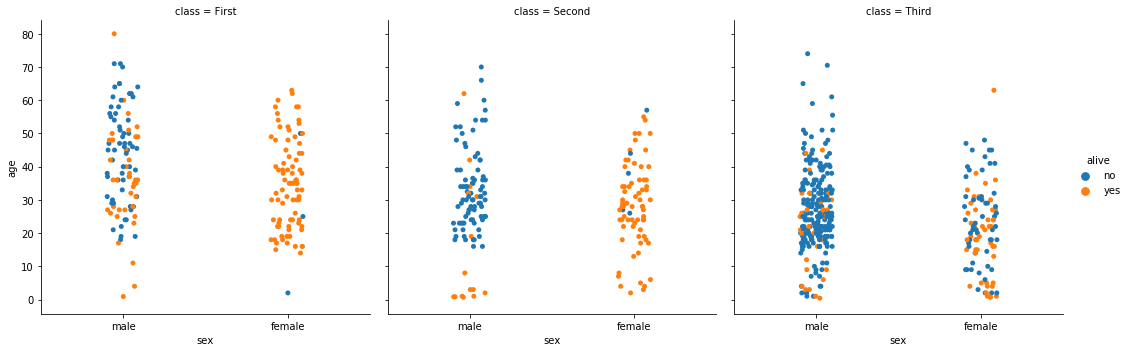

In [56]:
sns.catplot(x='sex', y='age',  col='class', hue='alive', data=titanic);

### Color palettes

Where we specify hue, or are using more than one color in a plot we can specify the palette we want to use for different colors. 

http://seaborn.pydata.org/tutorial/color_palettes.html

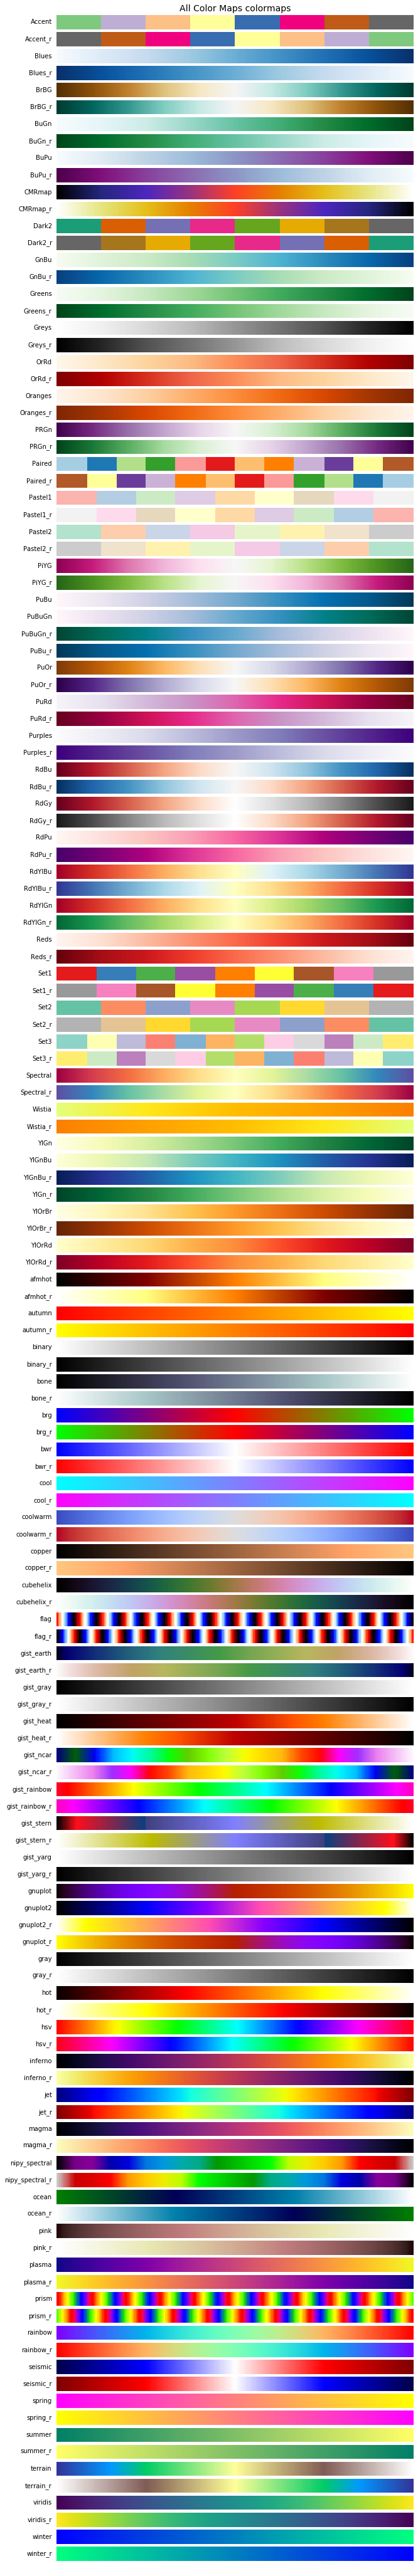

In [57]:
# Code to show all color maps (just run do not worry about what the code is doing- this is for reference only)

cmaps =  [('All Color Maps',
"Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, \
           BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, \
           Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, \
           Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, \
           Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, \
           PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, \
           RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, \
           Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral,\
           Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, \
           YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, \
           autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, \
           bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, \
           cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, \
           gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, \
           gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, \
           gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, \
           gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, \
           hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, \
           nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, \
           pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, \
           seismic, seismic_r, spring, spring_r, summer, summer_r, terrain, \
           terrain_r, viridis, viridis_r, winter, winter_r".replace(" ", "").split(',')
          )]
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    height = 0.4 * nrows
    fig, axes = plt.subplots(nrows=nrows, figsize=(10, height))
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:

    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show();

# code source: https://stackoverflow.com/questions/48114473/scaling-plot-sizes-with-matplotlib

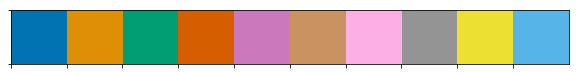

In [58]:
sns.palplot(sns.color_palette("colorblind", 10))

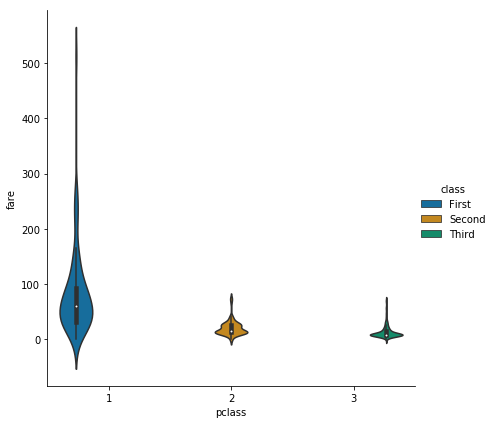

In [59]:
sns.catplot(x='pclass', y='fare',  hue='class', kind='violin', palette='colorblind',height=6,data=titanic);

### Facetting plots: seperate for categorical variables 

Facetting maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.

We can asign <code>row=</code>, <code>col=</code> or both as a categorical variable, instructing python to plot a series of graphs, each in a row/column which correspond to the data meeting the specified category.



specify a categorical variable 

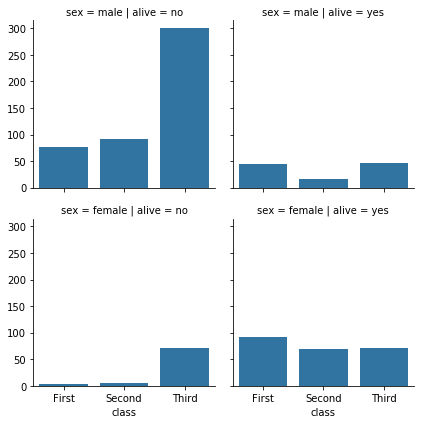

In [60]:
# define facetting and assign to variable g
g=sns.FacetGrid(titanic, col="alive", row="sex")

# Apply the plotting function to each facet’s (g) subset of the data. (map the plotting to the facet grid)
g.map(sns.countplot, "class",  data =titanic)
g;

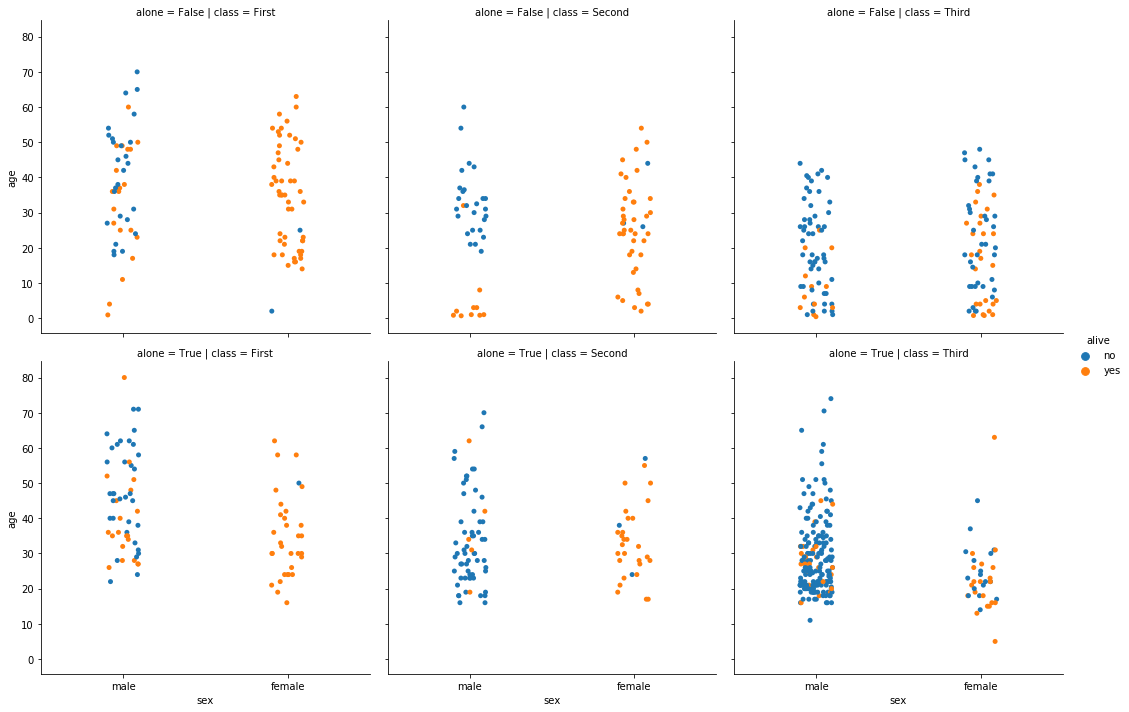

In [61]:
sns.catplot(x='sex', y='age',  col='class', row='alone', hue='alive',  data=titanic)

### Strip, swarm, violin, box, boxen, point and bar plots (categorical + numerical data vis) 


<code>sns.catplot()</code> can also be used to draw other caeogrical plot types, inclusing some we have already covered, by specifying <code>kind= </code>

<code>kind =</code>:

- 'strip': stip plot (default)
- 'swarm': swarm plot
- 'violin': violin plot
- 'box': box plots 
- 'boxen': boxen plots
- 'point': point plot
- 'bar': bar plot

These are demonstrated in the code below, do not worry about trying to reporduce the code below, the comments are just for your own interest. 



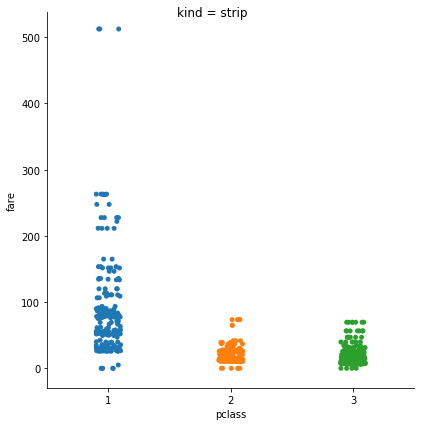

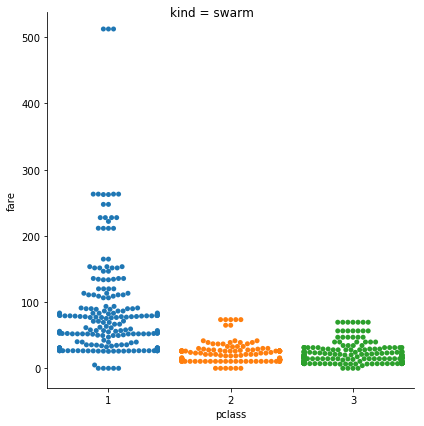

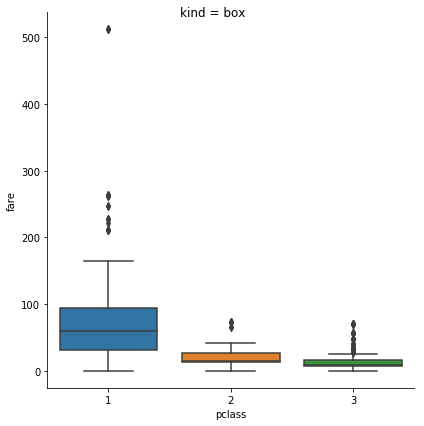

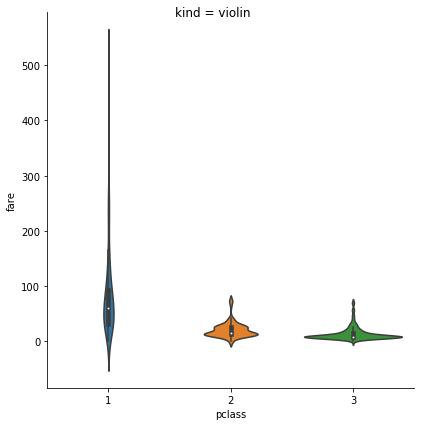

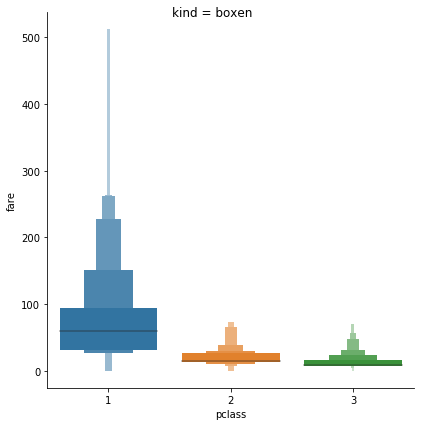

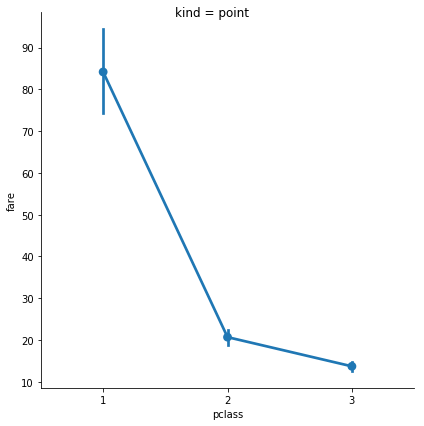

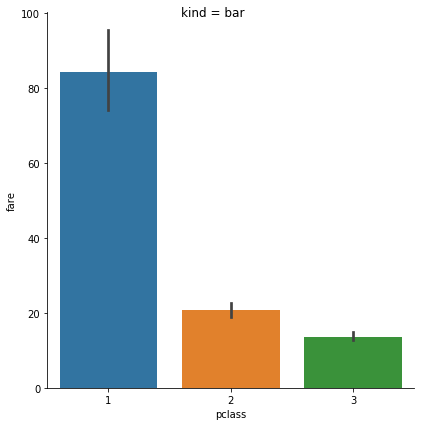

In [62]:
# List of all catplot kind variables
kind =['strip','swarm','box','violin','boxen','point','bar']

# for element in the list kind
for i in kind:
    # plot a catplot where kind refers to the ith element in the list
    g=sns.catplot(x='pclass', y='fare', data=titanic, height=6, dodge=True, kind=i)
    # add title to the plot 'kind = ith elemnt in the list'
    g.fig.suptitle('kind = '+i)
    

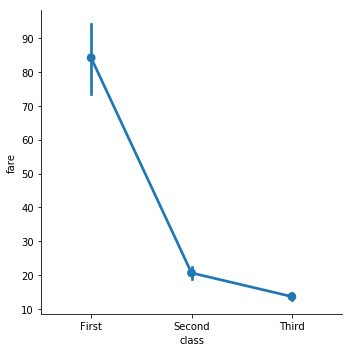

In [63]:
sns.catplot(data=titanic, kind='point', y='fare',x='class')

## Data Visualisation to aid analysis

### Pair plots 
To get a better sense of how the variables are all related we can plot a pairplot: plotting all the variables against each other in a grid. Where variables are plotted against themselves a histogram is plotted instead to show the distribution of the data (plotted on the diagonal). <br>
Seaborn has a simple <code>.pairplot()</code> function
<br> <font color='orchid'> <b>Run the code below </b></font>

In [64]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Convert boolean to integer for pair plot plotting

In [65]:
titanic_clean = titanic
titanic_clean["adult_male"] = titanic_clean["adult_male"].astype(int)
titanic_clean["alone"] = titanic_clean["alone"].astype(int)

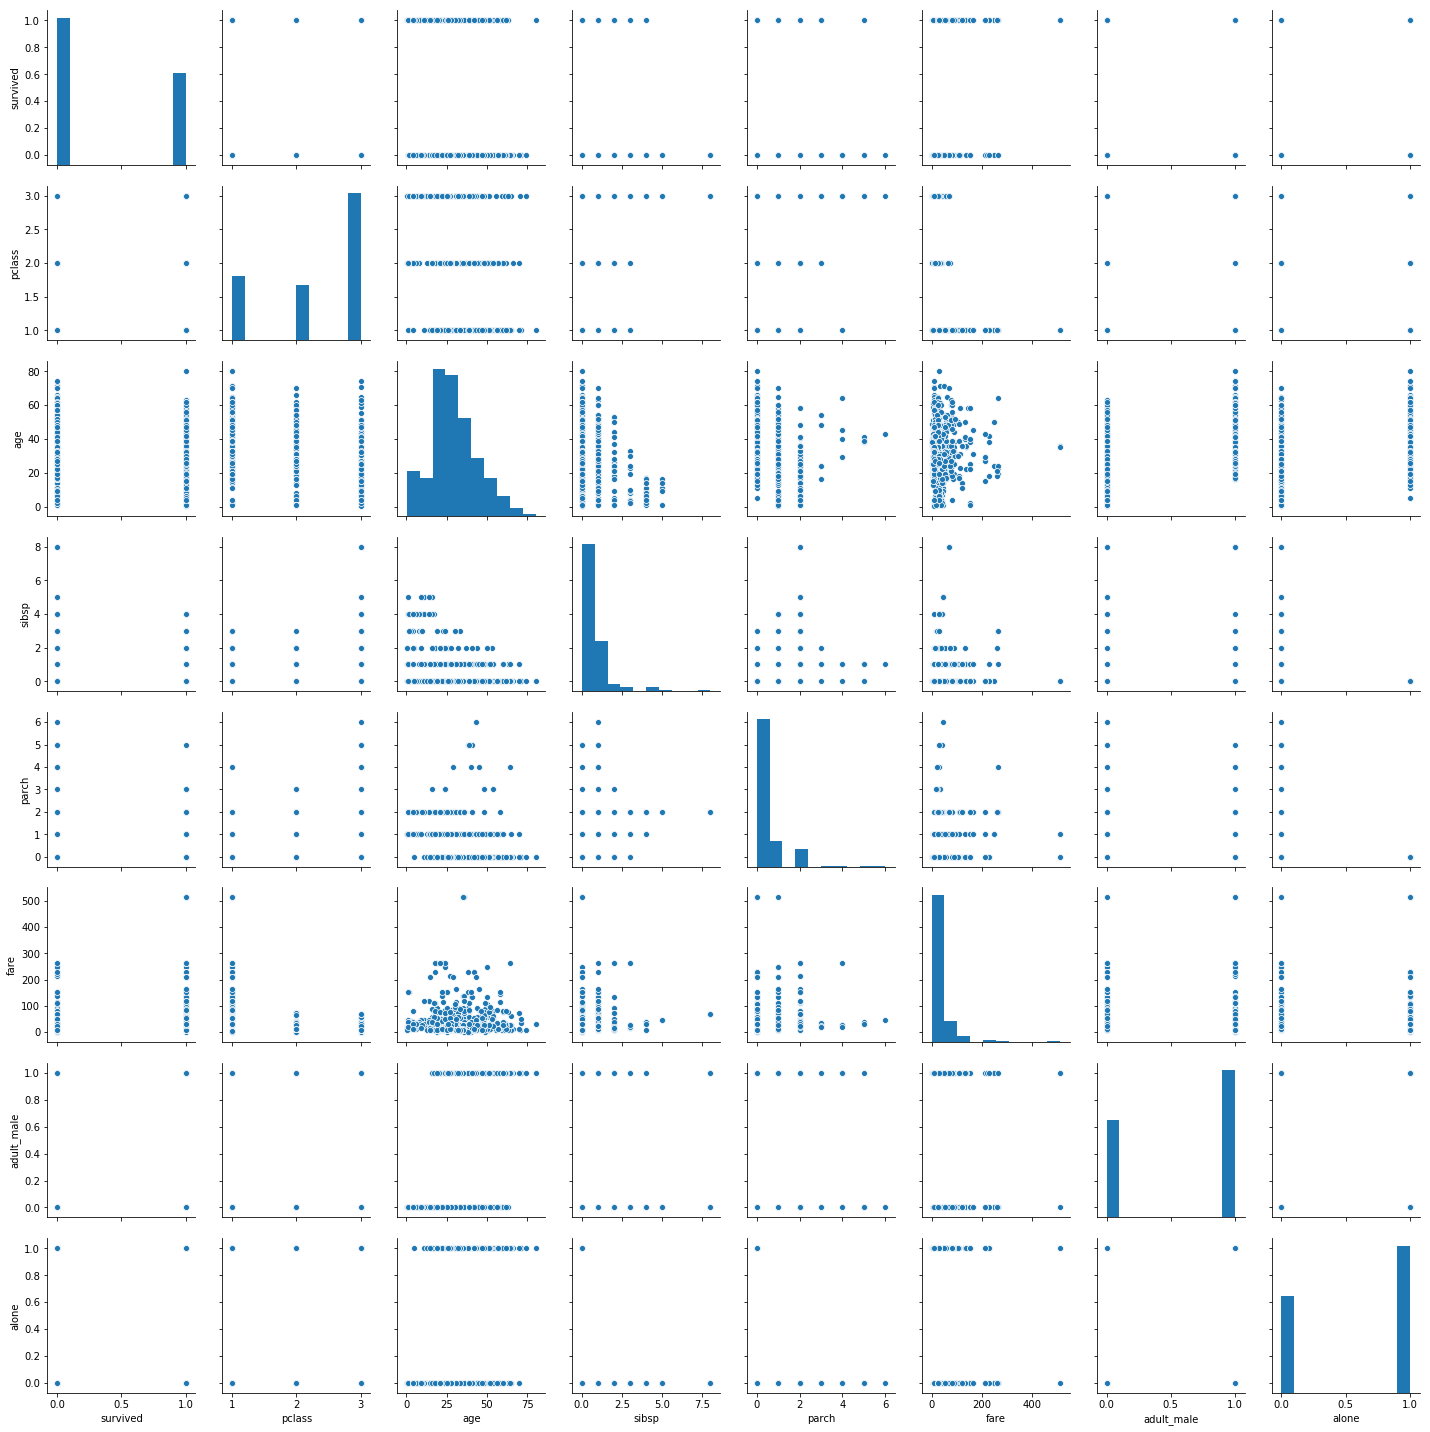

In [66]:
sns.pairplot(titanic_clean);

Similar to other seaborn plot you can define a variable to represent colour (hue) in the pairplot. E.g.<code> hue ='class'</code>

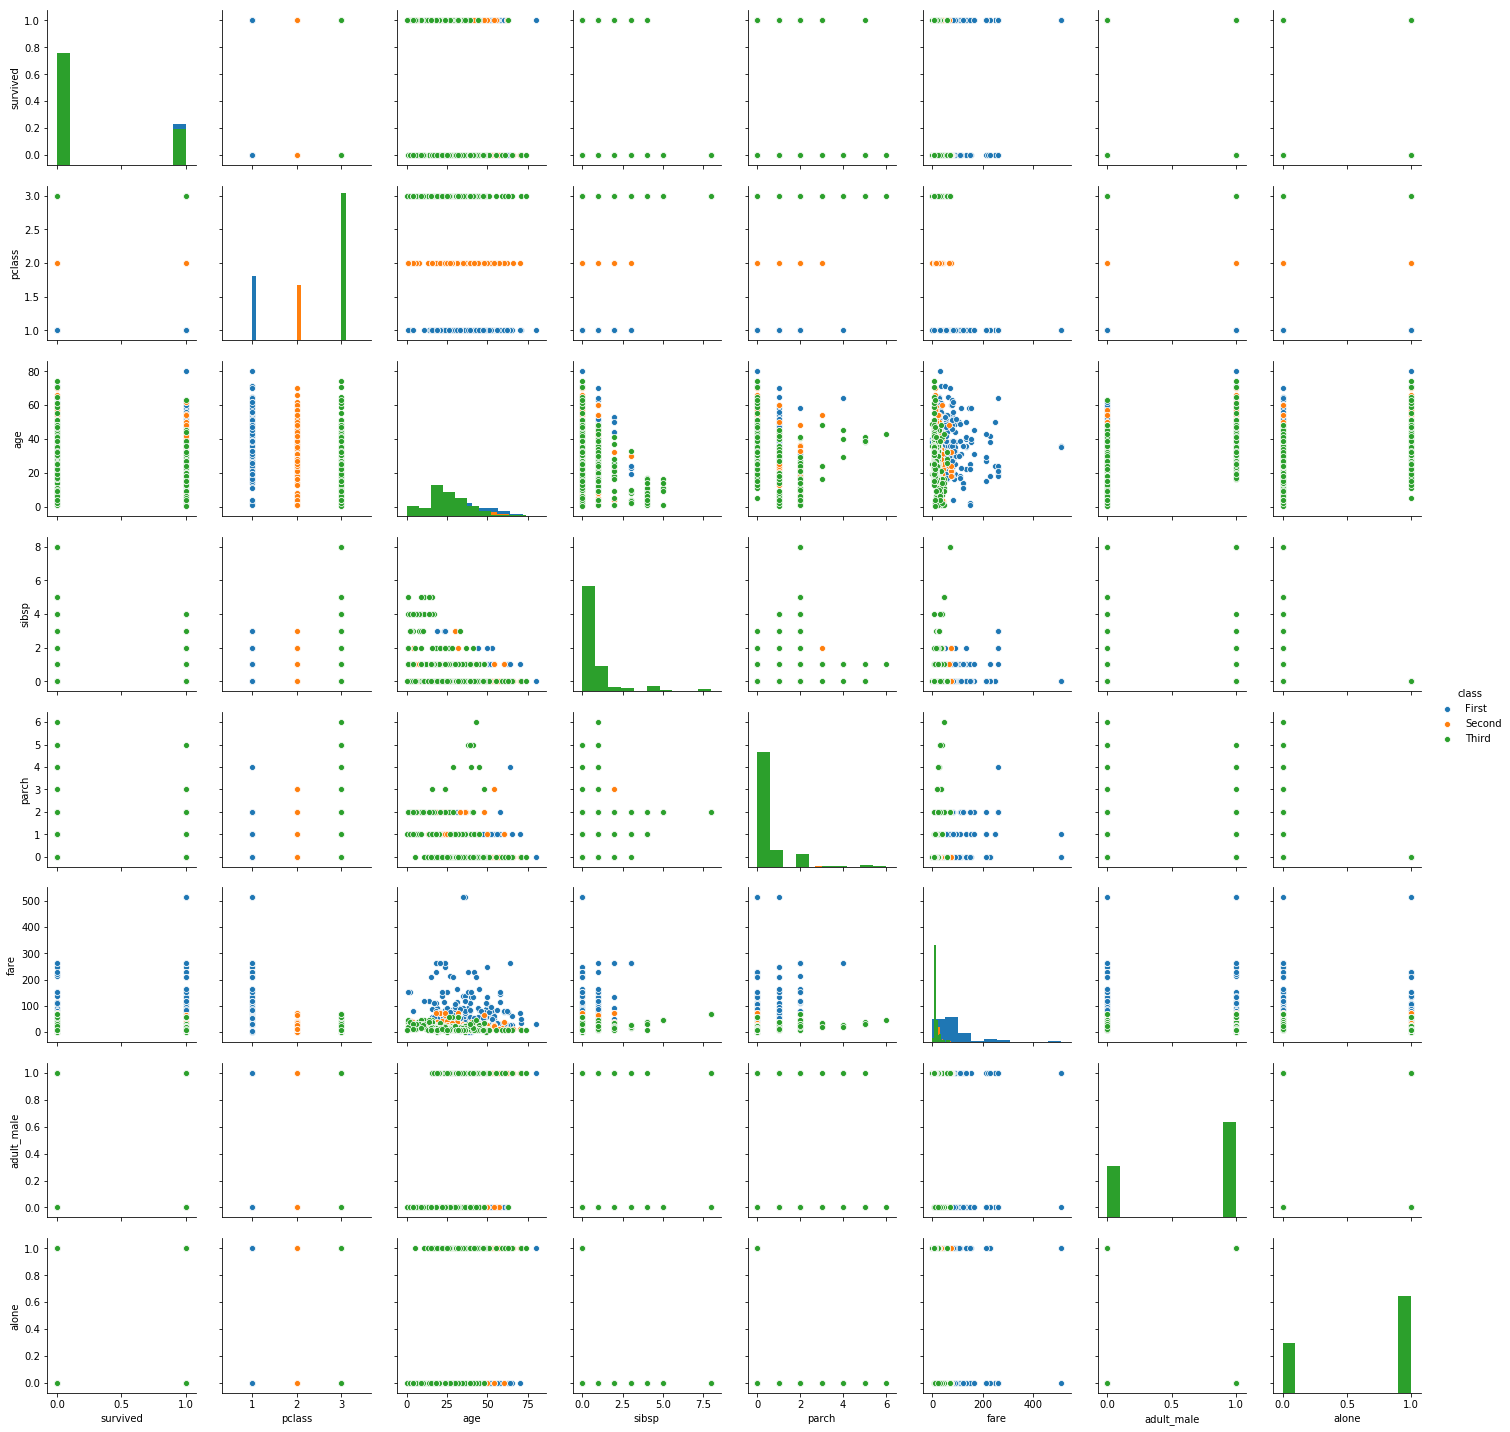

In [67]:
sns.pairplot(titanic_clean, hue='class',diag_kind='hist');

### Heatmap (variable correlation)


We can only calculate the correlation of numeric data. TO do this we will sue the <code>df.select_dtypes(include=np.number)</code> to select only the numeric columns

In [68]:
titanic_numeric = titanic.select_dtypes(include=np.number)


In [69]:
titanic_numeric.corr()

survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000

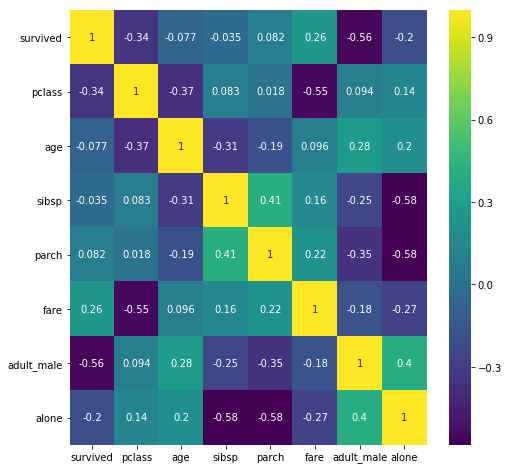

In [70]:
# set figure size
plt.figure(figsize=(8,8))
# plot a heatmap of the correlation table created above, annot= True annotates the cells with the correlation value
sns.heatmap(titanic_numeric.corr(), annot=True, cmap='viridis');

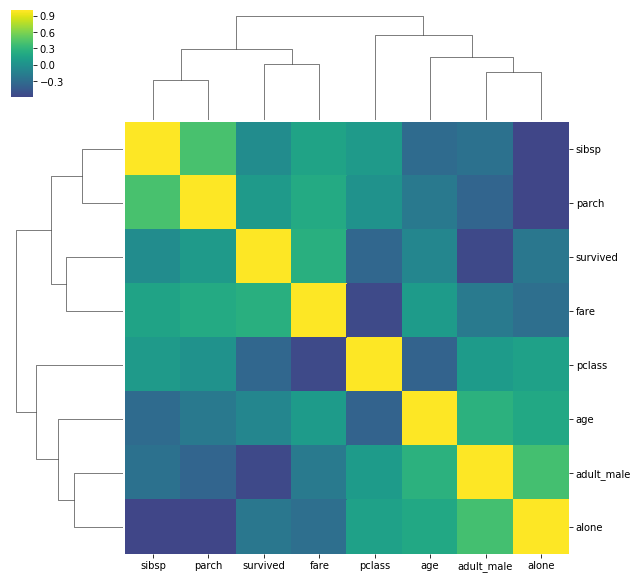

In [71]:
sns.clustermap(titanic_numeric.corr(), center=0, cmap='viridis')

## Exercise Answers
### 3.3 <a class="tocSkip"> </i>
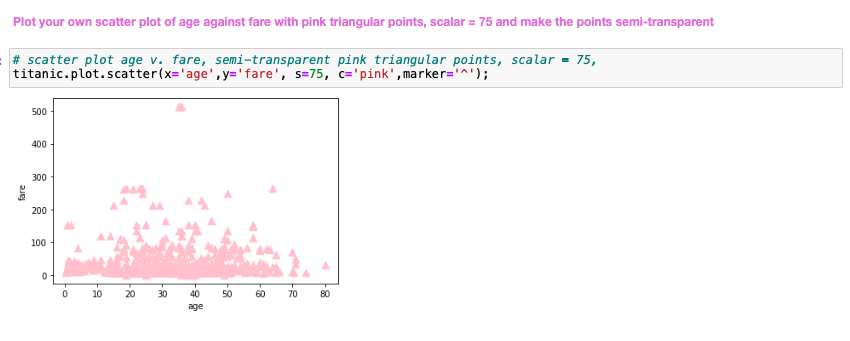
3.4
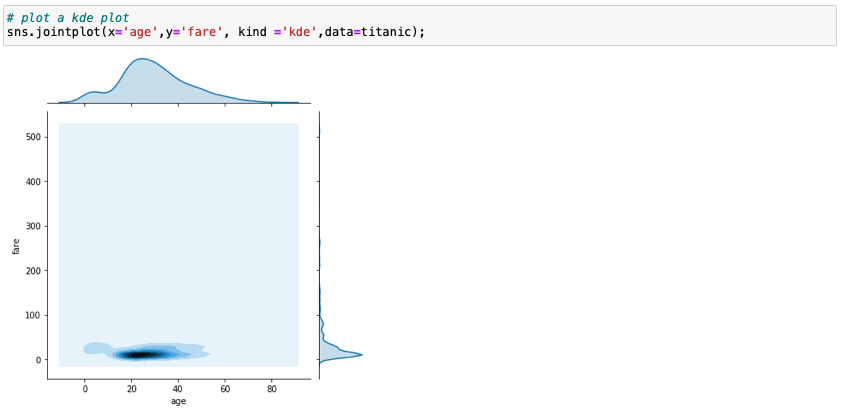
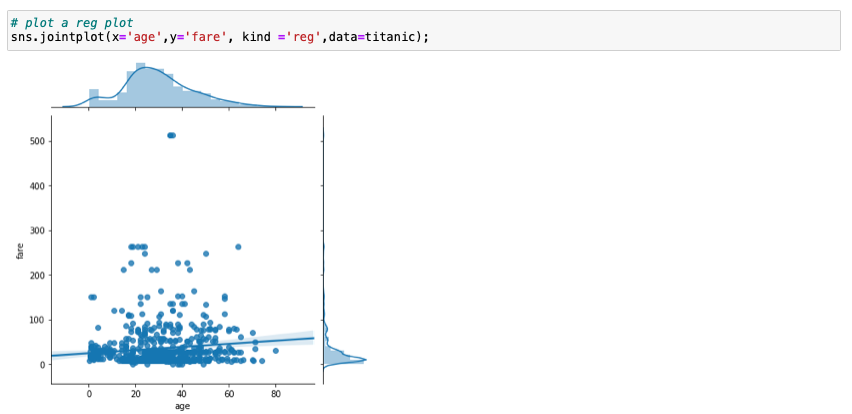
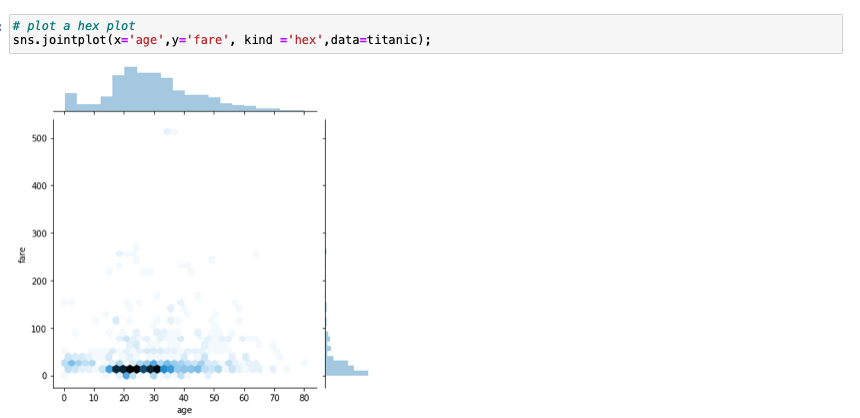
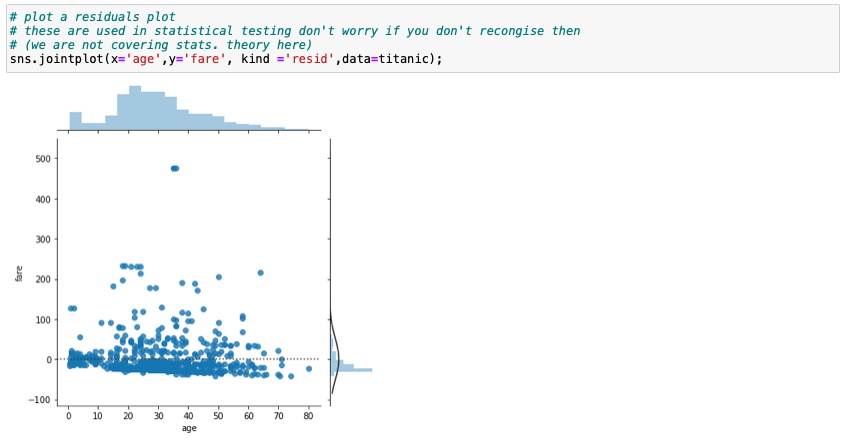

If you are interested try looking at the [seaborn example gallery](https://seaborn.pydata.org/examples/index.html) and experiment by plotting some of the visualisations with the coffee data. <br>
You can also try reading in your own data (make sure its in a CSV format- this is easy to do [for excel spreadsheets](https://www.ablebits.com/office-addins-blog/2014/04/24/convert-excel-csv/)) using <code>pd.read_csv()</code> and making your own visualistaions.

In [4]:
penguins = sns.load_dataset('penguins')

In [81]:
penguins.describe()


bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

In [92]:
penguins.head()


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

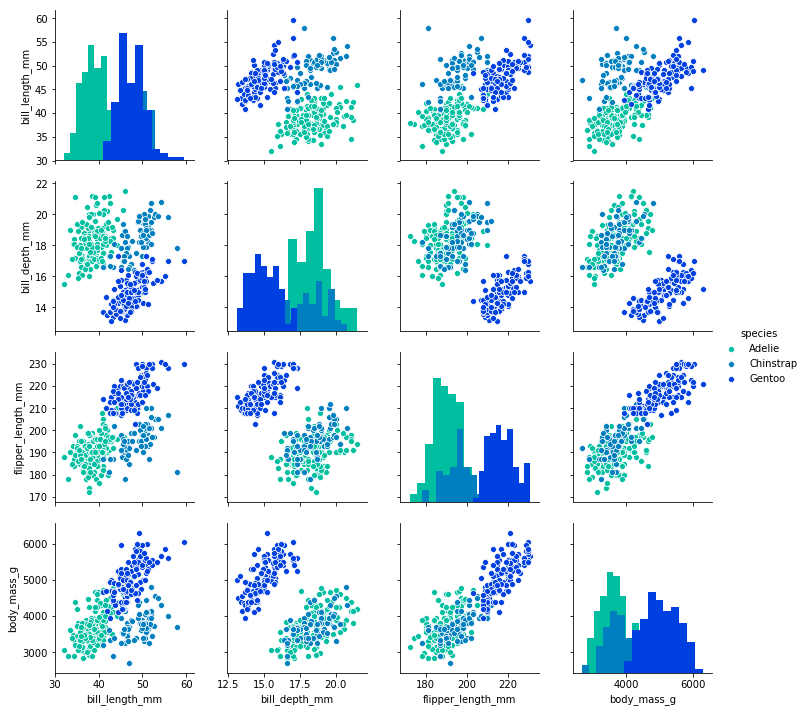

In [95]:
sns.pairplot(penguins, hue='species',diag_kind='hist', palette = 'winter_r');

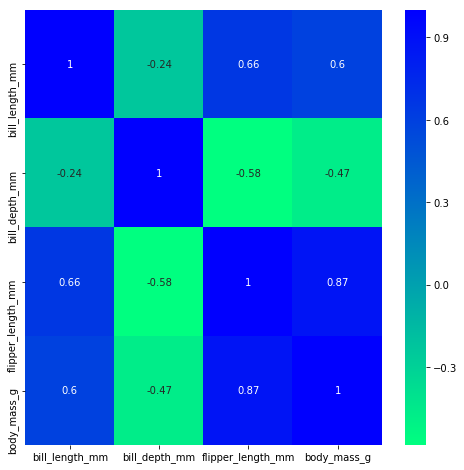

In [96]:
# set figure size
plt.figure(figsize=(8,8))
# plot a heatmap of the correlation table created above, annot= True annotates the cells with the correlation value
sns.heatmap(penguins.corr(), annot=True, cmap='winter_r');

In [108]:
Rename columns for neater display


SyntaxError: invalid syntax (<ipython-input-108-2dd58303d557>, line 1)

In [6]:
penguins.rename(columns = {'species':'Species', 'island':'Island',
                              'bill_length_mm':'Bill Length',
                              'bill_depth_mm':'Bill Depth',
                              'flipper_length_mm':'Flipper Length',
                              'body_mass_g':'Body Mass',
                              'sex':'Sex'}, inplace = True)

In [105]:
penguins.head()


Species     Island  Bill Length  Bill Depth  Flipper Length  Body Mass  \
0  Adelie  Torgersen         39.1        18.7           181.0     3750.0   
1  Adelie  Torgersen         39.5        17.4           186.0     3800.0   
2  Adelie  Torgersen         40.3        18.0           195.0     3250.0   
3  Adelie  Torgersen          NaN         NaN             NaN        NaN   
4  Adelie  Torgersen         36.7        19.3           193.0     3450.0   

      Sex  
0    MALE  
1  FEMALE  
2  FEMALE  
3     NaN  
4  FEMALE

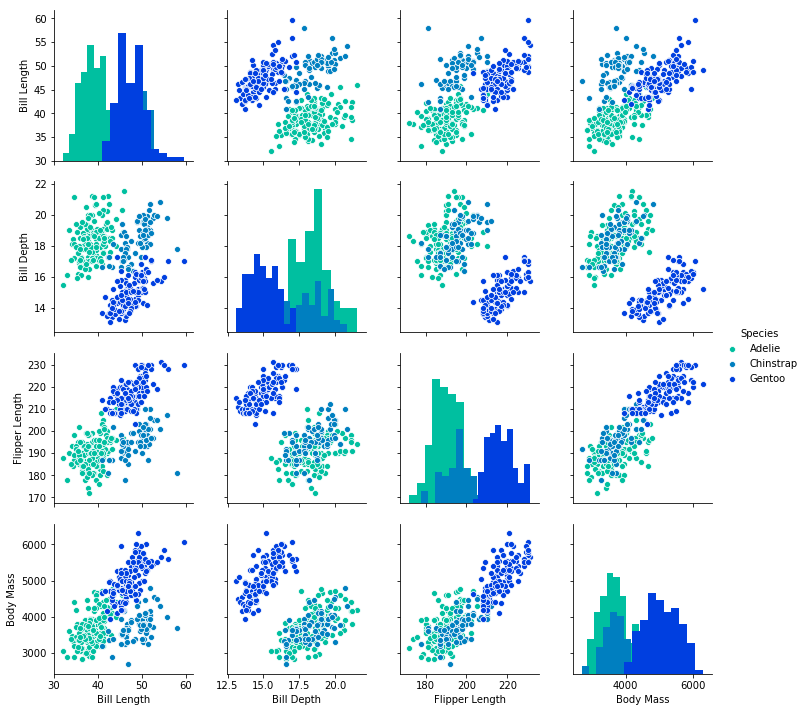

In [110]:
sns.pairplot(penguins, hue='Species',diag_kind='hist', palette = 'winter_r');

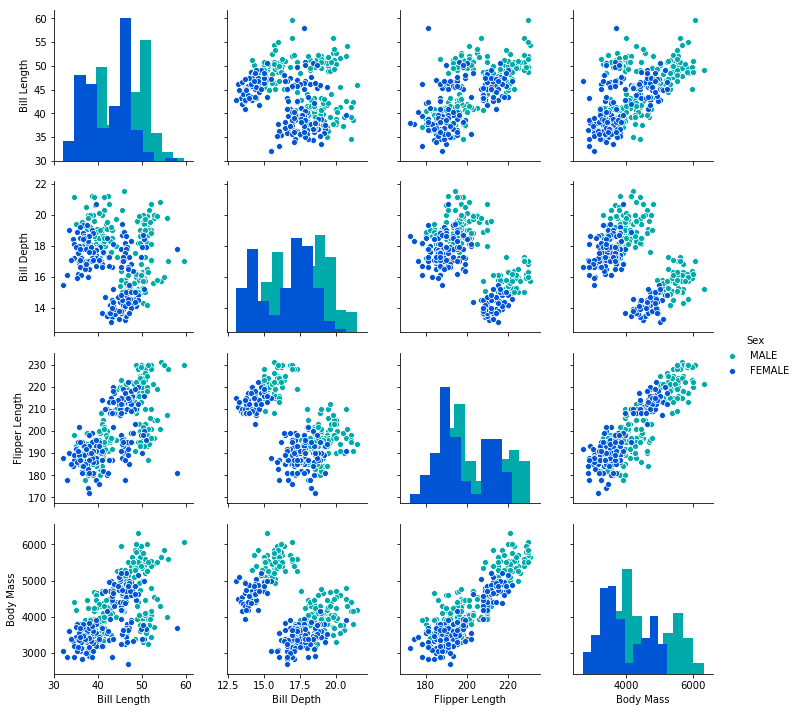

In [111]:
sns.pairplot(penguins, hue='Sex',diag_kind='hist', palette = 'winter_r');

Text(0.5, 1.05, 'Relationships between numerical variables')

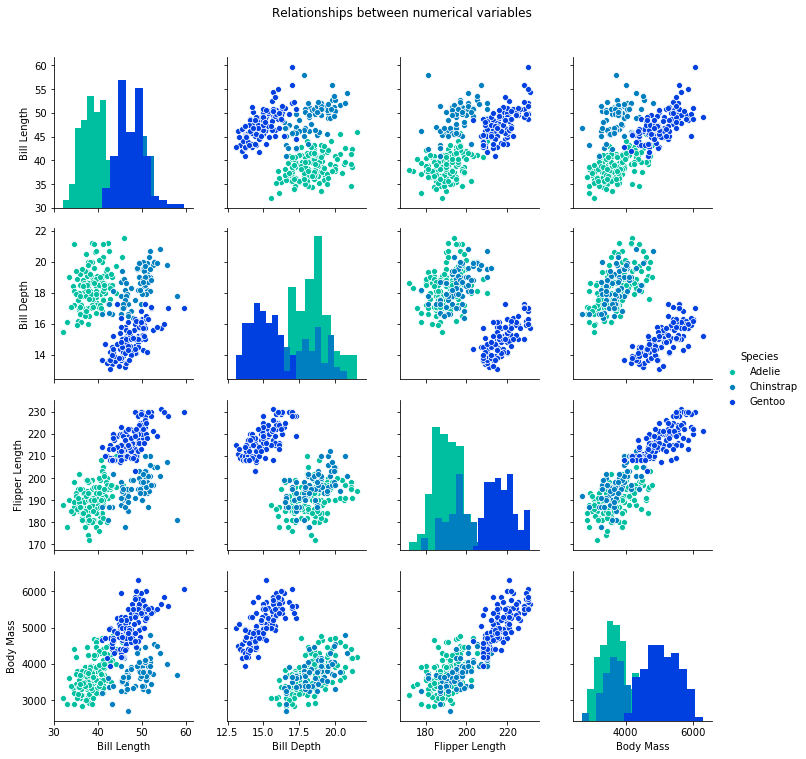

In [7]:
sns.pairplot(penguins.dropna(),hue='Species',diag_kind='hist', palette = 'winter_r').fig.suptitle('Relationships between numerical variables', y=1.05)

# Exercise: Data manipulation and statistical analysis.
- Grouping data to apply functions
- Considering how we handle different data types differently
- Time series data
- OLS regression
- Generalised linear models (for count outcomes)



## Bike share data
We visited this Bike share data yesterday from Transport for London, downloaded from [Kaggle](https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset). I have downloaded the data and saved it as a csv file for you in the notebook directory. You can also download the dataset yourselves.

#### Note about Kaggle <a class="tocSkip">
Kaggle is a great source of datasets which are free to download to get started with doing some data analysis. They also run data challenges where a dataset and problem will be given for you to solve. These challenges are a great way to practice your data science skills.

#### About the data <a class="tocSkip">
    
Bike sharing is where bicycles are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" and return it at another dock belonging to the same system. Docks are special bike racks that lock the bike, and only release it by computer control. The user enters payment information, and the computer unlocks a bike. The user returns the bike by placing it in the dock, which locks it in place. [Source](https://en.wikipedia.org/wiki/Bicycle-sharing_system)
    
If you are unfamiliar with the concept of bike sharing in the UK have a quick read of this [article](https://tfl.gov.uk/modes/cycling/santander-cycles/how-it-works) <br>

Some metadata information about the variables:
- <b>cnt</b>: The count of new bike shares
- <b>timestamp</b>: date and time of new bike share
- <b>t1</b>: real temperature in Celsius
- <b>t2</b>: "feels like" temperature in Celsius 
- <b>hum</b>: humidity in percentage
- <b>wind_speed</b>: wind speed in km/h
- <b>weather_code</b>: category of the weather
    - Description:
        - 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
        - 2 = scattered clouds / few clouds
        - 3 = Broken clouds
        - 4 = Cloudy
        - 7 = Rain/ light Rain shower/ Light rain
        - 10 = rain with thunderstorm
- <b>is_holiday</b>: boolean field: 1 holiday / 0 non holiday
- <b>is_weekend</b>: boolean field: 1 if the day is weekend/ 0 weekday
- <b>season</b>: category field of meteorological seasons: 0: spring ; 1: summer; 2: autumn; 3:winter
    
For a bit of a reminder of data manipulation yesterday and to get the data into a plottable form:    
    
<br> <font color='orchid'> <b>Run the code below to read in the data </b></font>



In [8]:
# read in data from a csv file to a pandas dataframe
# if you have downloaded the file yourself and saved it elsewhere remember to change the ("file directory")

bike = pd.read_csv("Intro_to_Python/london_merged.csv")

#### Explore the data <a class="tocSkip">
Explore the data yourselves using the <code>.head()</code>, <code>.tail()</code> and <code>.describe()</code> functions introduced in exercise 1.
<br> <font color='orchid'> <b>Write your own code below </b></font>

In [9]:
# explore the data
bike.describe()


cnt            t1            t2           hum    wind_speed  \
count  17414.000000  17414.000000  17414.000000  17414.000000  17414.000000   
mean    1143.101642     12.468091     11.520836     72.324954     15.913063   
std     1085.108068      5.571818      6.615145     14.313186      7.894570   
min        0.000000     -1.500000     -6.000000     20.500000      0.000000   
25%      257.000000      8.000000      6.000000     63.000000     10.000000   
50%      844.000000     12.500000     12.500000     74.500000     15.000000   
75%     1671.750000     16.000000     16.000000     83.000000     20.500000   
max     7860.000000     34.000000     34.000000    100.000000     56.500000   

       weather_code    is_holiday    is_weekend        season  
count  17414.000000  17414.000000  17414.000000  17414.000000  
mean       2.722752      0.022051      0.285403      1.492075  
std        2.341163      0.146854      0.451619      1.118911  
min        1.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000      0.000000  
50%        2.000000      0.000000      0.000000      1.000000  
75%        3.000000      0.000000      1.000000      2.000000  
max       26.000000      1.000000      1.000000      3.000000

In [ ]:
# explore the data


Let us also check the data type of each of the columns in the bike dataframe using <code>.dtypes</code> to see if they are what we expect.
<br> <font color='orchid'> <b>Run the code below </b></font>

In [10]:
bike.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code      int64
is_holiday        int64
is_weekend        int64
season            int64
dtype: object

#### Metadata and data type comaprison  <a class='tocSkip'>

We would expect temperature (t1,t2), percentage humidity (hum) and wind speed (wind_speed) to be floats as these values are not limited to whole whole numbers. <br>

We would also expect cnt to be an integer as you cannot get half a bike share. <br>

Though is_holiday and is_weekend are boolean (1 or 0 aka True or False) we will leave them as integers for now to make later analysis easier.<br>

We can see that the timestamp column has been read in as object. While it should be a datetime data type. We can convert the object to datetime using the pandas function <code>pd.to_datatime</code>

<br> <font color='orchid'> <b>Run the code below </b></font>

In [11]:
bike['timestamp']

0        04/01/2015 00:00
1        04/01/2015 01:00
2        04/01/2015 02:00
3        04/01/2015 03:00
4        04/01/2015 04:00
5        04/01/2015 05:00
6        04/01/2015 06:00
7        04/01/2015 07:00
8        04/01/2015 08:00
9        04/01/2015 09:00
10       04/01/2015 10:00
11       04/01/2015 11:00
12       04/01/2015 12:00
13       04/01/2015 13:00
14       04/01/2015 14:00
15       04/01/2015 15:00
16       04/01/2015 16:00
17       04/01/2015 17:00
18       04/01/2015 18:00
19       04/01/2015 19:00
20       04/01/2015 20:00
21       04/01/2015 21:00
22       04/01/2015 22:00
23       04/01/2015 23:00
24       05/01/2015 00:00
25       05/01/2015 01:00
26       05/01/2015 02:00
27       05/01/2015 03:00
28       05/01/2015 04:00
29       05/01/2015 05:00
               ...       
17384    02/01/2017 18:00
17385    02/01/2017 19:00
17386    02/01/2017 20:00
17387    02/01/2017 21:00
17388    02/01/2017 22:00
17389    02/01/2017 23:00
17390    03/01/2017 00:00
17391    03/

In [17]:
bike['timestamp'] = pd.to_datetime(bike['timestamp'])

In [81]:
bike['timestamp'] = pd.to_datetime(bike['timestamp'])

In [18]:
# re-run d.types to check timestamp is now datetime
bike.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code             int64
is_holiday               int64
is_weekend               int64
season                   int64
dtype: object

### Visualising the bike share data.

To get a better sense of how the variables are all related we can plot a pair plot as we did in section 3.6
<br> <font color='orchid'> <b>Run the code below* </b></font> 

*this might take a minute or two

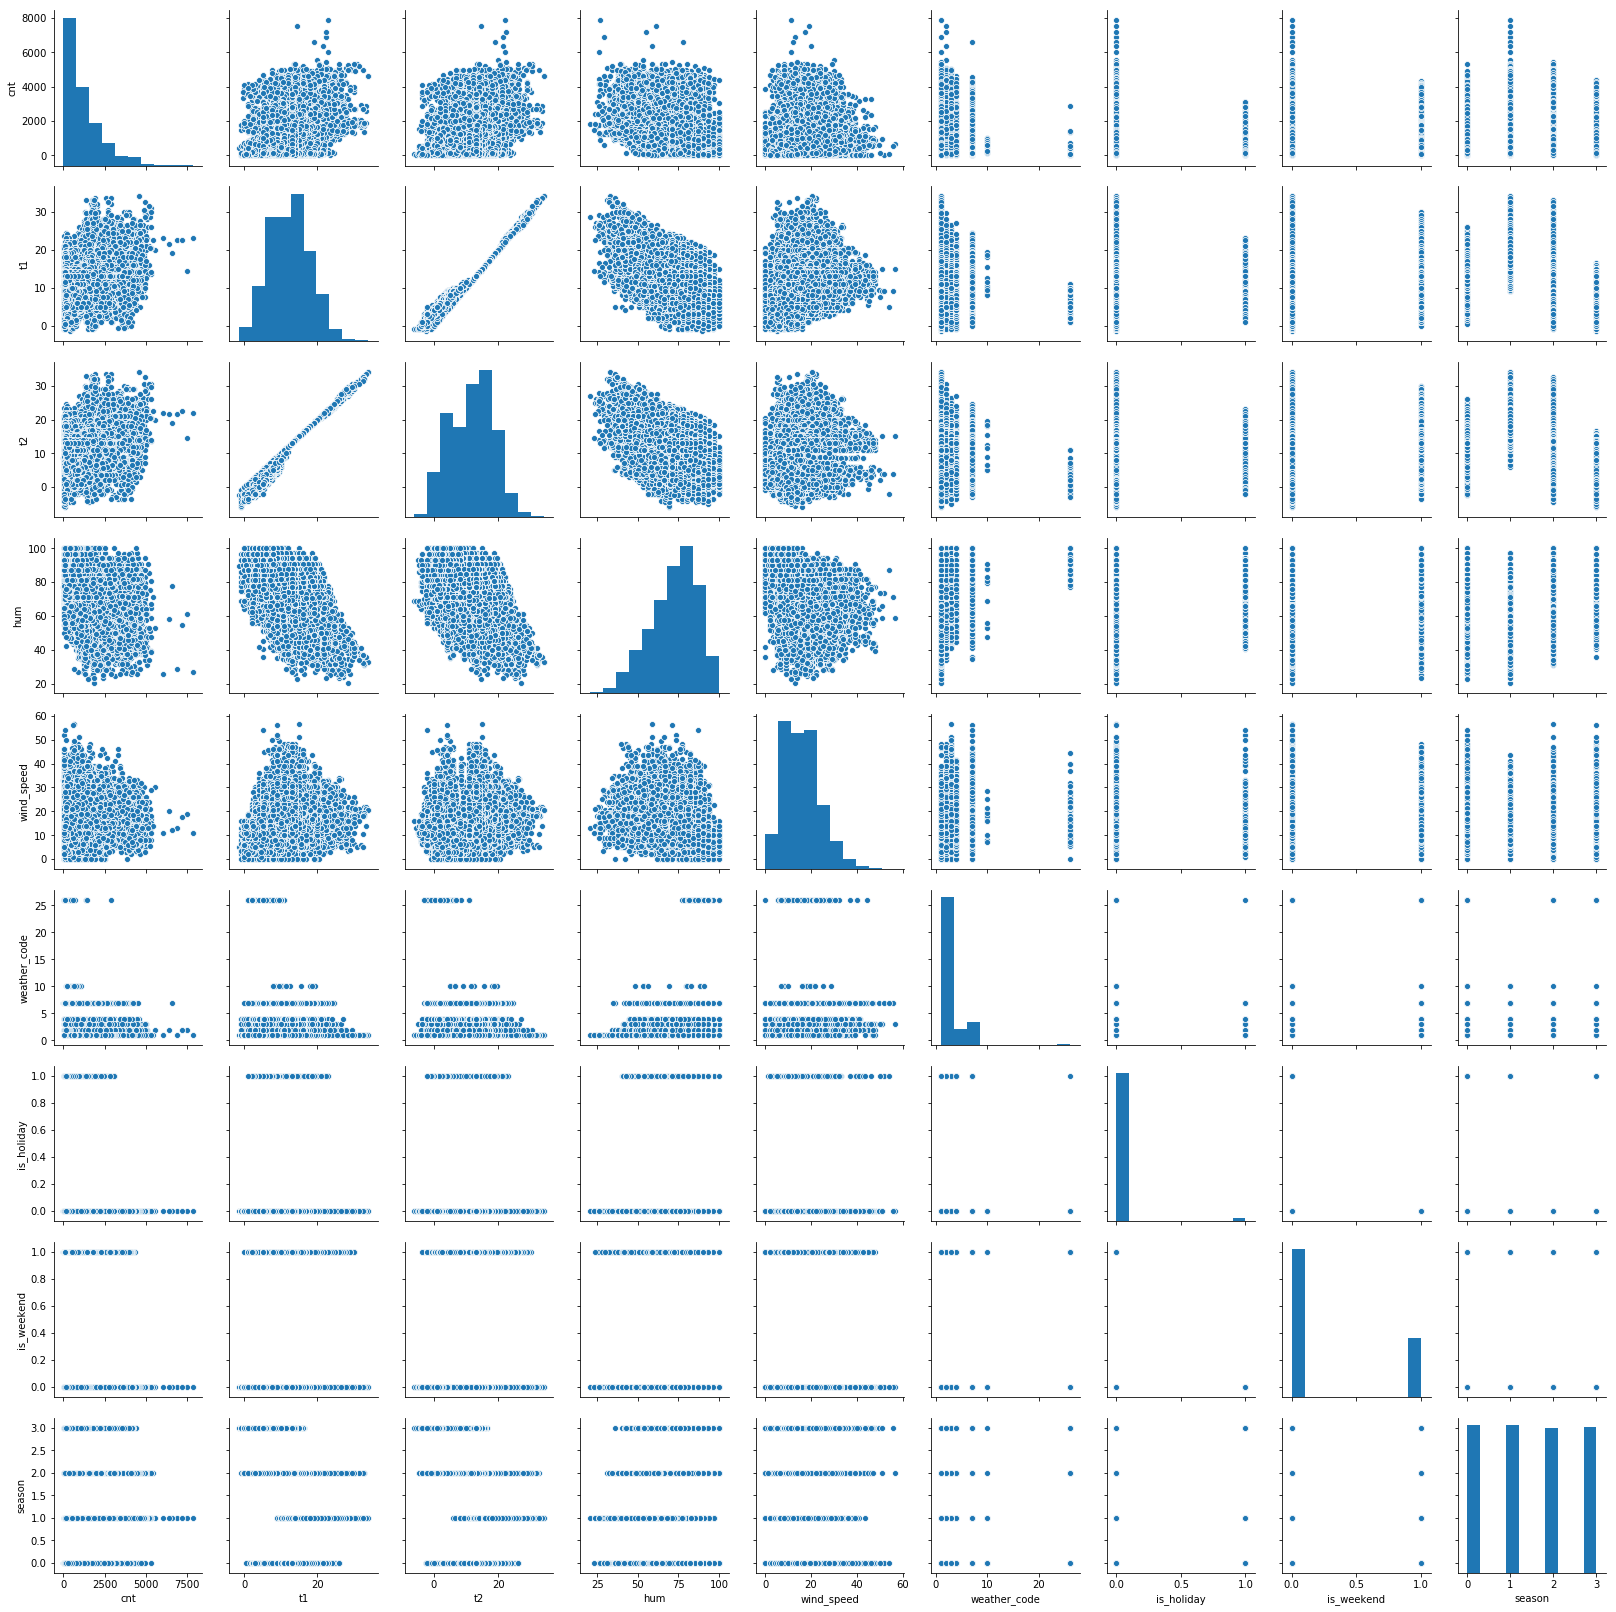

In [84]:
sns.pairplot(bike);

#### What can we tell from the pairplots above? <a class="tocSkip">

Try and answer the following questions looking at the plot above:
- Is the week or weekend more popular for bike shares?
- Is there a relationship between weather and season?
- Do holidays affect bike share use?
- Which variables are most highly correlated? Is this surprising?
- Is there a trend between number of bike shares and percentage humidity?
- Which of the numerical variables are normally distributed and which are skewed<br>
<br>
- What do you think will be the best predictors of bike share count?

##### Write any notes/ answers here in this markdown (text) cell.
-  
- 
- 
- 
- 
- 


## Introduction to the  groupby function
### What is the<code>.groupby()</code> function?
An explanation from the [package documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html):<br>
<i>"A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups"</i>

<code>.groupby()</code> is useful to group data to identify interesting patterns and calculate some summary statistics that give us more insight into the data. <code>.groupby()</code> can also be used to group data before we plot it, to make more interesting graphs and visualisations.

We can group the bike dataframe by <code>'is_weekend'</code>, then use the <code>.size()</code> function to calculate how many days are classified as being a weekend or weekday.
<br> <font color='orchid'> <b>Run the code below </b></font>

In [19]:
# group the bike dataframe by 'is_weekend', then use the .size() function
bike.groupby('is_weekend').size()

is_weekend
0    12444
1     4970
dtype: int64

We can also group the data and then calculate summary statistics (using the functions introduced last workshop: <code>.mean()</code>, <code>.median()</code>, <code>.quantile(0.25)</code>, <code>.max()</code>, <code>.min()</code>)

<br> <font color='orchid'> <b>Run the code below then experiment calculating your own summary statistics on grouped data</b></font>

In [86]:
bike.groupby('is_weekend').mean()

cnt         t1         t2        hum  wind_speed  \
is_weekend                                                             
0           1209.274831  12.486901  11.556413  72.070797   15.855794   
1            977.415694  12.420993  11.431757  72.961318   16.056455   

            weather_code  is_holiday    season  
is_weekend                                      
0               2.660077    0.030858  1.491321  
1               2.879678    0.000000  1.493964

In [87]:
# experiment here
bike.groupby('is_weekend').median()

cnt    t1    t2   hum  wind_speed  weather_code  is_holiday  \
is_weekend                                                                
0           927  12.5  12.5  74.5        15.0             2           0   
1           619  12.5  12.5  75.5        15.0             2           0   

            season  
is_weekend          
0                1  
1                1

In [ ]:
# experiment here


In [ ]:
# experiment here


If you are interested in calculating the summary stats. of one column you can put it in squared brackets after the groupby function <br> I.e. <code><font color='red'>dataframe_name</font>.groupby("<font color='red'>column_name to groupby</font>")["<font color='red'>column_name to calc. summary stats for</font>"].mean()</code>

In [88]:
# group the bike dataframe by 'is_weekend' and calcualte the mean number of bike shares ('cnt') for weekdays and weekends
bike.groupby('is_weekend')['cnt'].mean()

is_weekend
0    1209.274831
1     977.415694
Name: cnt, dtype: float64

<font color='orchid'><b> Write your own function to group the bike dataframe by 'is_weekend' and calculate the <b>maximum</b> daily number of bike shares ('cnt') on a weekday and weekend </font> (Solution at the end of the exercise if you get stuck)

In [89]:
bike.groupby('is_weekend')['cnt'].max()

is_weekend
0    7860
1    4341
Name: cnt, dtype: int64

<font color='orchid'> <b>Write your own function to calculate the mean number of bike shares for each season </b> </font> (Solution at the end of the exercise if you get stuck)

In [90]:
bike.groupby('season')['cnt'].mean()

season
0    1103.831589
1    1464.465238
2    1178.954218
3     821.729099
Name: cnt, dtype: float64

<font color='orchid'> <b>Write your own function to calculate the minimum number of daily bike shares for each weather type </b></font> (Solution at the end of the exercise if you get stuck)

In [91]:
bike.groupby('weather_code')['cnt'].min()

weather_code
1      10
2      16
3      12
4      14
7       0
10    150
26     15
Name: cnt, dtype: int64

## Plotting time series data

Let us plot the total number of bike share uses per day. Currently the bike share data is provided for every hour of every day so we need to group these together to calculate the totals for the day. First of all we need to create a new column for just the date. <br>
We do this using the datetime.date function: <code>.dt.date</code>
<br> <font color='orchid'> <b>Run the code below </b></font>

In [13]:
bike.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code      int64
is_holiday        int64
is_weekend        int64
season            int64
dtype: object

In [20]:
bike['date']= bike['timestamp'].dt.date

In [21]:
# let's check it has worked
bike.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-04-01 00:00:00  182  3.0  2.0   93.0         6.0             3   
1 2015-04-01 01:00:00  138  3.0  2.5   93.0         5.0             1   
2 2015-04-01 02:00:00  134  2.5  2.5   96.5         0.0             1   
3 2015-04-01 03:00:00   72  2.0  2.0  100.0         0.0             1   
4 2015-04-01 04:00:00   47  2.0  0.0   93.0         6.5             1   

   is_holiday  is_weekend  season        date  
0           0           1       3  2015-04-01  
1           0           1       3  2015-04-01  
2           0           1       3  2015-04-01  
3           0           1       3  2015-04-01  
4           0           1       3  2015-04-01

Next we need to use the <code>.groupby()</code> function to get a dataframe where each row is a unqiue day.<br>

To do this we need to think carefully about how we want to aggregate the columns of the dataframe:<br>

For <b>count</b> it makes sense to take the total number of bike share uses across all hours to get the total for the day: therefore we want to aggregate using the <code>.sum()</code> function.<br>

For the <b>temperature, humidity and wind speed</b> variables it does not make sense to take the sum of all hours (we would end up with very high temeperatures, humidities and wind speeds) instead taking the average value of all hours of the day makes more sense, using the <code>.mean()</code> function. <br>

As <b>weather_code</b> is a non-continuous categorical variable, where a number is used to represent the weather conditions, taking the most common hourly weather type during a day is the most sensible way to accurately represent the overall weather for that day. We can do this using the <code>pd.Series.mode</code> function.

For the <b> holiday, weekend, season</b> and <b>date</b> variables they will be the same across all hours of the day, so no calculation is needed. Instead we will just take the first value (for ease) using the <code>.first()</code> function.
<br> <font color='orchid'> <b>Run the code below to test this out </b></font>

In [22]:
# let's test this out
bike.groupby('date')['cnt'].sum()

date
2015-01-02    11305
2015-01-03    15641
2015-01-04    23539
2015-01-05    29579
2015-01-06    27864
2015-01-07    42641
2015-01-08    43017
2015-01-09    25556
2015-01-10    34562
2015-01-11    22848
2015-01-12    26559
2015-01-13    24697
2015-01-14    23565
2015-01-15    22968
2015-01-16    22663
2015-01-17    15268
2015-01-18    13199
2015-01-19    23034
2015-01-20    23247
2015-01-21    22782
2015-01-22    23278
2015-01-23    21892
2015-01-24    17539
2015-01-25    15094
2015-01-26    22710
2015-01-27    25000
2015-01-28    21536
2015-01-29    21275
2015-01-30    21171
2015-01-31    10250
              ...  
2016-12-05    38082
2016-12-06    17841
2016-12-07    29869
2016-12-08    40159
2016-12-09    39261
2016-12-10    32282
2016-12-11     8990
2016-12-12    25275
2016-12-13    26520
2016-12-14    28861
2016-12-15    28195
2016-12-16    27621
2016-12-17    17238
2016-12-18    14970
2016-12-19    23535
2016-12-20    24864
2016-12-21    23136
2016-12-22    21461
2016-12-23    1

In [23]:
# let's test this out
# we can add .head() to show just the first 5 lines
bike.groupby('date')[['t1','t2','hum','wind_speed']].mean().head()

t1         t2        hum  wind_speed
date                                                   
2015-01-02   3.791667  -0.895833  67.000000   24.770833
2015-01-03   9.187500   6.416667  66.687500   29.583333
2015-01-04   8.500000   4.937500  59.854167   31.708333
2015-01-05   9.083333   7.229167  64.250000   18.875000
2015-01-06  12.104167  11.437500  62.833333   23.645833

In [24]:
# let's test this out
bike.groupby('date')['weather_code'].apply(pd.Series.mode).head()

date         
2015-01-02  0    3
2015-01-03  0    2
2015-01-04  0    2
2015-01-05  0    2
2015-01-06  0    2
Name: weather_code, dtype: int64

In [25]:
# let's test this out
bike.groupby('date')[['is_holiday','is_weekend','season']].first().head()

is_holiday  is_weekend  season
date                                      
2015-01-02           0           1       3
2015-01-03           0           1       0
2015-01-04           0           0       0
2015-01-05           0           0       0
2015-01-06           0           0       1

We can do this all separately, but what if we want to produce a dataframe of the aggregated by day bike data?
It is not just as easy as directly combining the above code.
<font color='orchid'> Uncomment (remove #) and run the code below, note the error message </font>

In [26]:
bike.groupby('date')[['t1','t2','hum','wind_speed']].mean()[['is_holiday','is_weekend','season','date']].first()

KeyError: "None of [Index(['is_holiday', 'is_weekend', 'season', 'date'], dtype='object')] are in the [columns]"

To solve this we can use <code>.agg({})</code> function to apply ["one or more operations over the specified axis"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html).
<br> For each column we specify which function we want to apply to the aggreagated rows.<br>
The <code>{}</code> indicate a dictionary object where a set of objects (keys) are mapped to another set of objects (values)
i.e. the column is mapped to the required aggregation method.

<font color='orchid'> Run the code below and check you understand what it is doing </font>

In [27]:
bike_day = bike.groupby('date').agg({'cnt':'sum', 't1':'mean','t2':'mean','hum':'mean',
                                     'wind_speed':'mean','weather_code':pd.Series.mode,
                                     'is_holiday':'first','is_weekend':'first',
                                     'season':'first','date':'first'})
bike_day.head()

cnt         t1         t2        hum  wind_speed weather_code  \
date                                                                          
2015-01-02  11305   3.791667  -0.895833  67.000000   24.770833            3   
2015-01-03  15641   9.187500   6.416667  66.687500   29.583333            2   
2015-01-04  23539   8.500000   4.937500  59.854167   31.708333            2   
2015-01-05  29579   9.083333   7.229167  64.250000   18.875000            2   
2015-01-06  27864  12.104167  11.437500  62.833333   23.645833            2   

            is_holiday  is_weekend  season        date  
date                                                    
2015-01-02           0           1       3  2015-01-02  
2015-01-03           0           1       0  2015-01-03  
2015-01-04           0           0       0  2015-01-04  
2015-01-05           0           0       0  2015-01-05  
2015-01-06           0           0       1  2015-01-06

We can now plot number of bike shares by day of the week 

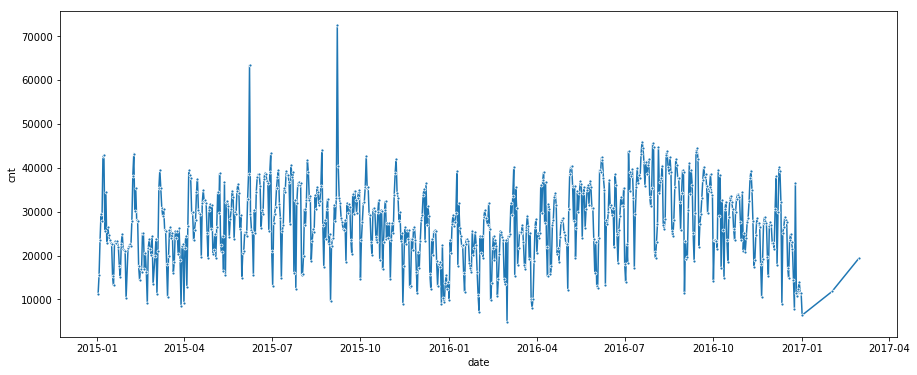

In [28]:
# change figure size
plt.figure(figsize=(15,6))


sns.lineplot(x="date", y="cnt", data=bike_day, marker='.');

## What influences bike share use?

Temperature seems a likely candidate to influence bike share usage, particularly in the UK- few people enjoy cycling in the freezing cold. But may hot temperatures also put people off cycling? <br>

Let's plot a <code>lmplot()</code> to fit a regression model to the actual temperature and count columns. <br>
<font color='orchid'> Run the code below </font>

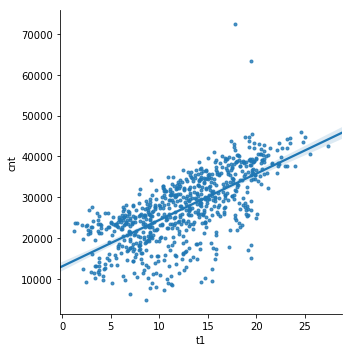

In [29]:
sns.lmplot(x="t1", y="cnt", data=bike_day, markers='.');

There is a pretty strong positive association between increased temperature and number of bike share uses. And warmer temperatures do not seem to be putting people off.

Does whether it is the weekend or not moderate how temperature is associated with the number of bike share uses? <br>
Let's fit another <code>lmplot()</code> this time specifying <code>hue</code> as 'is_weekend'. <br>
<font color='orchid'> Run the code below </font>

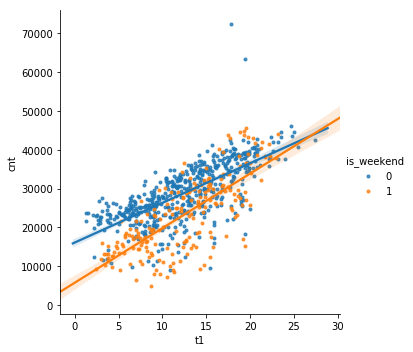

In [30]:
g = sns.lmplot(x="t1", y="cnt", hue="is_weekend", data=bike_day, markers='.');

Look at how the season moderates the correlation between temperature and number of bike share uses.<br>
<font color='orchid'> Run the code below </font>

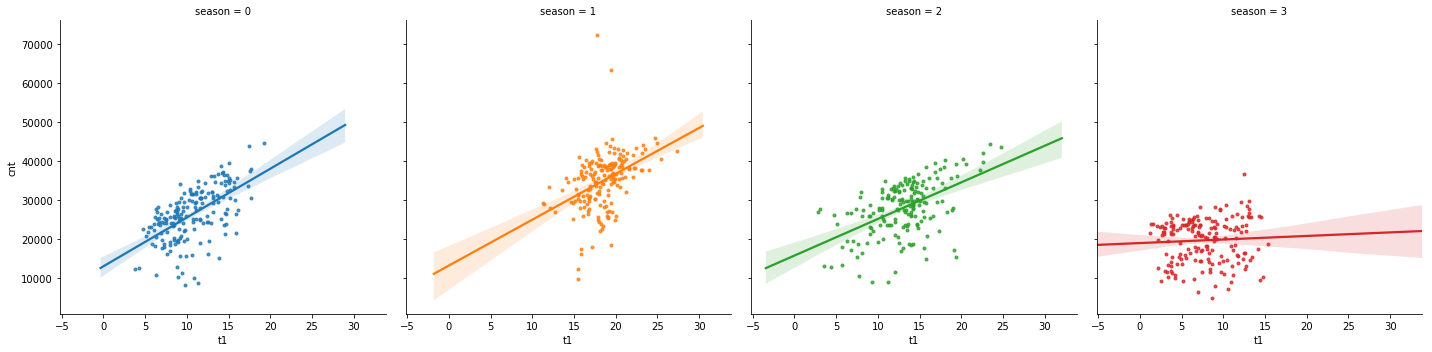

In [31]:
g = sns.lmplot(x="t1", y="cnt", hue="season", col="season", data=bike_day, markers='.');

<font color='orchid'> <b>Create other lmplots to explore how well the variables predict count of bike share uses </font> <br> 

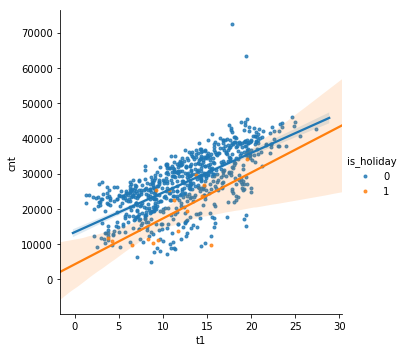

In [33]:
g = sns.lmplot(x="t1", y="cnt", hue="is_holiday", data=bike_day, markers='.');


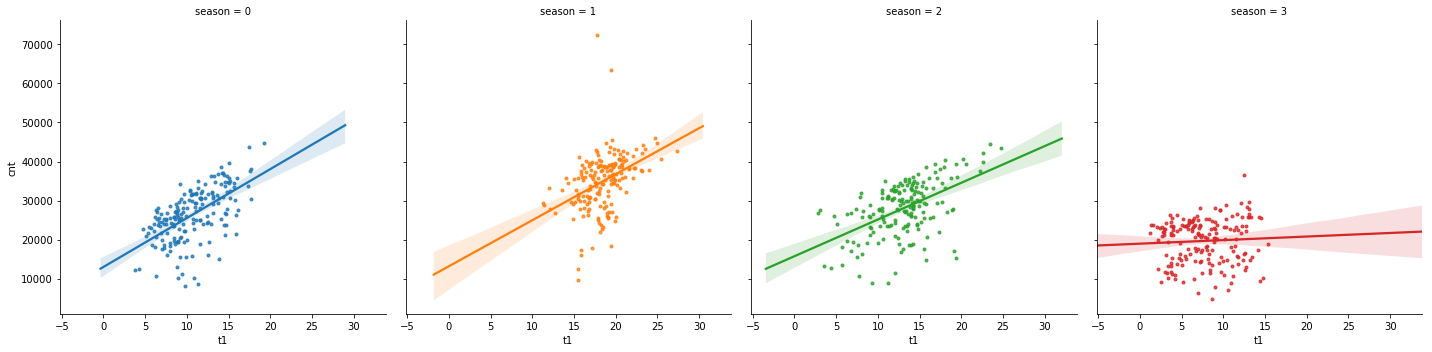

In [36]:
g = sns.lmplot(x="t1", y="cnt", hue="season", col="season", data=bike_day, markers='.');


In [ ]:
# lmplot()


## Linear Regression

As previously mentioned the stats. theory around regression will not be covered in great detail. We will just introduce you to running regression analysis in python and some useful other tools and visualisations to help you.

### Correlation
Before conducting a regression analysis it is important to understand which explanatory variables (X) may be correlated. We can explore this using the <code>.corr()</code> function. <br>
Results will be between -1 (absolute negative correlation to +1 (absoulte positive correlation)
<br> <font color='orchid'> <b>Run the code below </b></font>

In [37]:
bike.select_dtypes(include=np.number).corr()

cnt        t1        t2       hum  wind_speed  \
cnt           1.000000  0.388798  0.369035 -0.462901    0.116295   
t1            0.388798  1.000000  0.988344 -0.447781    0.145471   
t2            0.369035  0.988344  1.000000 -0.403495    0.088409   
hum          -0.462901 -0.447781 -0.403495  1.000000   -0.287789   
wind_speed    0.116295  0.145471  0.088409 -0.287789    1.000000   
weather_code -0.166633 -0.097114 -0.098385  0.334750    0.124803   
is_holiday   -0.051698 -0.042233 -0.040051  0.032068   -0.002606   
is_weekend   -0.096499 -0.005342 -0.008510  0.028098    0.011479   
season       -0.116180 -0.285851 -0.285900  0.290381    0.010305   

              weather_code  is_holiday  is_weekend    season  
cnt              -0.166633   -0.051698   -0.096499 -0.116180  
t1               -0.097114   -0.042233   -0.005342 -0.285851  
t2               -0.098385   -0.040051   -0.008510 -0.285900  
hum               0.334750    0.032068    0.028098  0.290381  
wind_speed        0.124803   -0.002606    0.011479  0.010305  
weather_code      1.000000    0.012939    0.042362  0.098976  
is_holiday        0.012939    1.000000   -0.094898 -0.032488  
is_weekend        0.042362   -0.094898    1.000000  0.001067  
season            0.098976   -0.032488    0.001067  1.000000

This is a useful set of information, but quite difficult to quickly compare values across columns and rows. We can plot a <code>sns.heatmap()</code> which colours each cell depending on the level of correlation between the column and row variables.]<br> <font color='orchid'> <b>Run the code below </b></font>

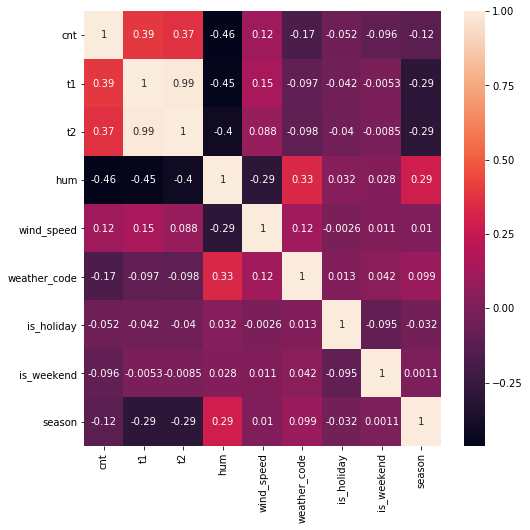

In [38]:
# set figure size
plt.figure(figsize=(8,8))
# plot a heatmap of the correlation table created above, annot= True annotates the cells with the correlation value
sns.heatmap(bike.select_dtypes(include=np.number).corr(), annot=True);

### Simple Linear Regression

To make it simple we are going to first show you how to predict continuous data, so we will be prediciting temperature
<br> <font color='orchid'> <b>Run the code below </b></font>

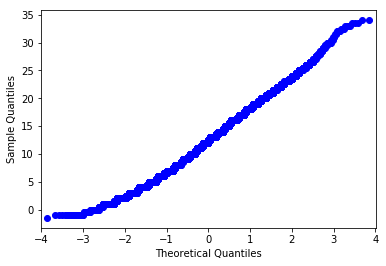

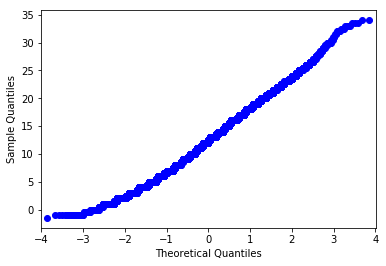

In [40]:
qqplot(bike['t1'])
       # plot a qqplot to see if t1 is normally distributed (package imported above)


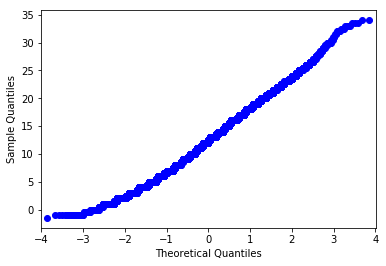

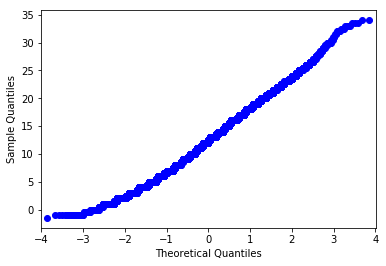

In [45]:
sm.qqplot(bike['t1'])

't1' looks fairly normally distibuted so we will go ahead and build a simple linear regresssion model

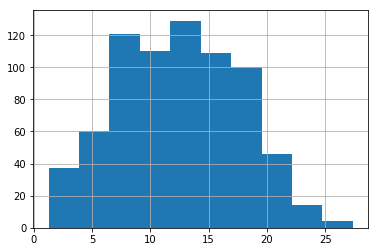

In [41]:
bike_day['t1'].hist()

### Fitting an OLS model
<br> <font color='orchid'> <b>Run the code below, using the comments to aid your understanding </b></font>

In [42]:
# predict temperature given the known number of bike shares

# define X and y
X = bike["cnt"] # explanatory variable
y = bike["t1"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     t1   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                 2.558e+04
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:29   Log-Likelihood:                -62363.
No. Observations:               17414   AIC:                         1.247e+05
Df Residuals:                   17413   BIC:                         1.247e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cnt            0.0067   4.18e-05    159.950      0.000       0.007       0.007
==============================================================================
Omnibus:                     2115.295   Durbin-Watson:                   0.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3310.304
Skew:                          -0.870   Prob(JB):                         0.00
Kurtosis:                       4.240   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model evaluation
To interpret these results, we need to look at the following results:<br>

<b>R$^{2}$</b> - this tells us the percentage of the dependent variable explained by the model. R-square is always between 0% and 100%, 100% suggesting that the model explains all the variability in the data. Here, r-square is 0.595, indicating that the model explains 59.5% of the variability, and therefore suggesting that the model fits the data fairly well. <br>

<b>P value </b>- the p-value tells us whether the relationship could have happened by chance. Small values (<0.05) mean that these results are significant, and probably did not occur by chance, showing us that there is a relationship between these variables. This is the case here, as the reuslts show us that the P value is 0.000. <br>

<b>AIC</b> - if you have several models, the AIC can be used to assess how good one model is compared to the others, and can therefore be used to identify the best model. As a general rule, a decrease of more than 3 suggests a model improvement.<br>

<b>Coefficient</b> - coefficients represent the mean change in the dependent variable (i.e. temperature) for one unit of change in the explanatory variable (i.e. bike count). So, here, every additional bike used, corresponds to a temperature increases of 0.0067 degrees. 

<b>Confidence Intervals</b> - [0.025,0.975] represents the range in which our coefficients are likely to fall (with a likelihood of 95%- i.e. we expect 95% of the time the values will fall between these two values). If the confidence interval spans 0 this suggests poor model fit. As this suggests the model predicts both a positive and negative association between the independent and dependent variables. 

Have a look at R$^{2}$, AIC, the coefficent, [0.025,0.975] and P>|t| (p value) to evaluate model fit

### Visual Model evaluation

#### Plot OLS regression plot

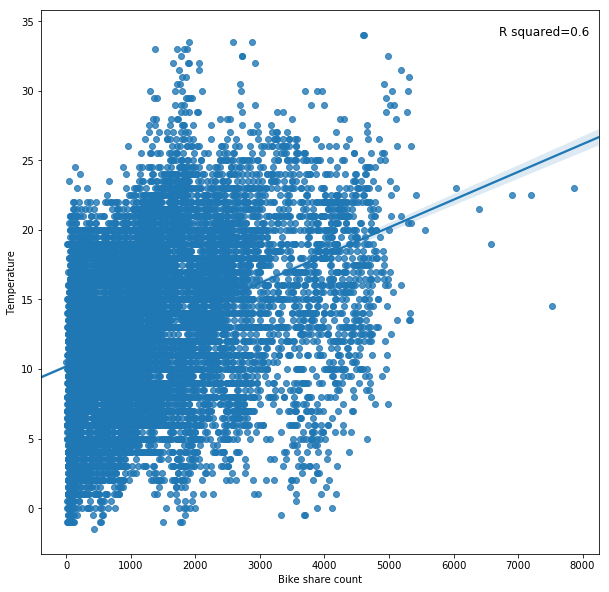

In [43]:
# define r squared
# model.rsquared: return the R^2 value
# round( ,2): rounds R^2 to 2 decimal places
r2 = round(model.rsquared,2)

# define figure size
fig, ax = plt.subplots(figsize=(10,10))

# plot regression plot 
sns.regplot(data=bike, x='cnt', y='t1');

# add text lable
# 6700, 35: text postion based on x and y axsis
# "R squared=" +str(r2) : label equated to text "R squared=" and defined rsqaured as a string
# specify fontsize
ax.text(6700, 34, "R squared=" +str(r2), fontsize=12)
ax.set_xlabel('Bike share count')
ax.set_ylabel('Temperature');

#### Plot actual versus predicted values
We are going to plot predicted temperature against actual temperature to evaluate our model.<br>
The closer the points to a straight diagonal line the better the fit.
<br> <font color='orchid'> <b>Run the code below </b></font>

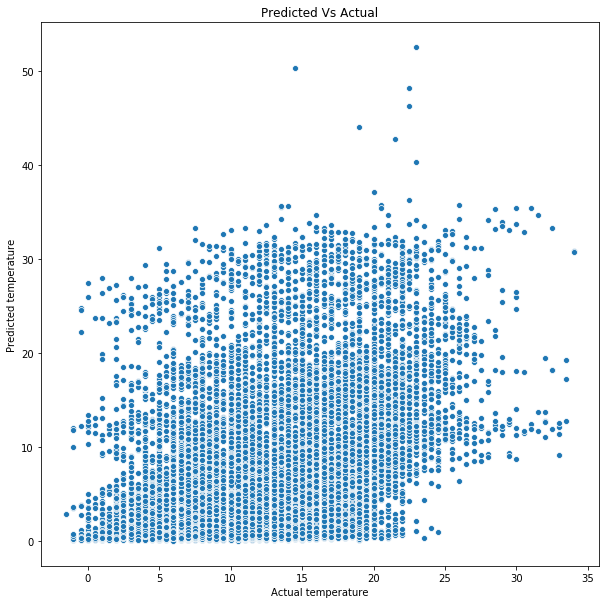

In [46]:
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot( x=bike['t1'],y=model.fittedvalues);

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual temperature')
ax.set_ylabel('Predicted temperature');

#### Plot Residuals
<font color='orchid'> <b>Run the code below </b></font>

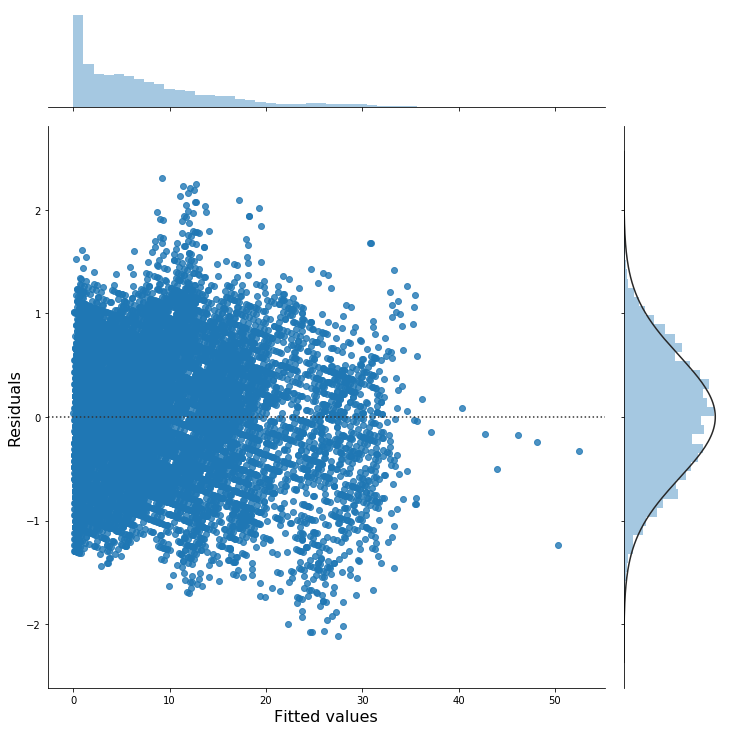

In [47]:
# Plot residuals plot

g =sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='resid',height=10)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=16);

### Creating dummy variables

For categorical variables to be entered into a OLS they need to be converted to dummy variables. <br>

<font color='orchid'> <b>Run the code below to create a dataframe "bike_dummies" with dummy variables in.<br>
    
Try printing 'weather_dummies' and 'hol_dummies' to get an idea of what the dummy variables look like. </font>


In [50]:
season_dummies = pd.get_dummies(bike['season'], prefix='season')
weather_dummies = pd.get_dummies(bike['weather_code'], prefix='weather')
hol_dummies = pd.get_dummies(bike['is_holiday'], prefix='hol')
wk_dummies = pd.get_dummies(bike['is_weekend'], prefix='wk')
bike_dummies = pd.concat([bike, season_dummies, weather_dummies, hol_dummies, wk_dummies], axis=1)
bike_dummies.head()


timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-04-01 00:00:00  182  3.0  2.0   93.0         6.0             3   
1 2015-04-01 01:00:00  138  3.0  2.5   93.0         5.0             1   
2 2015-04-01 02:00:00  134  2.5  2.5   96.5         0.0             1   
3 2015-04-01 03:00:00   72  2.0  2.0  100.0         0.0             1   
4 2015-04-01 04:00:00   47  2.0  0.0   93.0         6.5             1   

   is_holiday  is_weekend  season  ... weather_2  weather_3  weather_4  \
0           0           1       3  ...         0          1          0   
1           0           1       3  ...         0          0          0   
2           0           1       3  ...         0          0          0   
3           0           1       3  ...         0          0          0   
4           0           1       3  ...         0          0          0   

   weather_7  weather_10  weather_26  hol_0  hol_1  wk_0  wk_1  
0          0           0           0      1      0     0     1  
1          0           0           0      1      0     0     1  
2          0           0           0      1      0     0     1  
3          0           0           0      1      0     0     1  
4          0           0           0      1      0     0     1  

[5 rows x 26 columns]

To enter the categorical variables into the model, add all the dummy variables bar one

### Define your own OLS models

<br> <font color='orchid'> <b>Have a go at writitng your own code to create the following OLS models:</b></font>
1. y: t1,   X: hum, wind_speed
- y: t1,    X: t2
- y: t1,    X: season (i.e. season_0, season_1, season_2) <- see example below
- y: t1,    X: weather_code
- y: t1,    X: hum, wind_speed, season, weather_code


#### Visualise the models using the visual model evaluation code from 4.5.5 <a class='tocSkip'>

In [51]:
# q1: define the model
# predict temperature given the known number of bike shares

# define X and y
# note [[]] when defining more than one explanatory variables in a list
X = bike[["hum","wind_speed"]] # explanatory variable
y = bike["t1"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     t1   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 3.166e+04
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:52:29   Log-Likelihood:                -56877.
No. Observations:               17414   AIC:                         1.138e+05
Df Residuals:                   17412   BIC:                         1.138e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hum            0.0952      0.001     76.010      0.000       0.093       0.098
wind_speed     0.3115      0.005     59.913      0.000       0.301       0.322
==============================================================================
Omnibus:                      492.259   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              533.361
Skew:                           0.426   Prob(JB):                    1.52e-116
Kurtosis:                       2.910   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

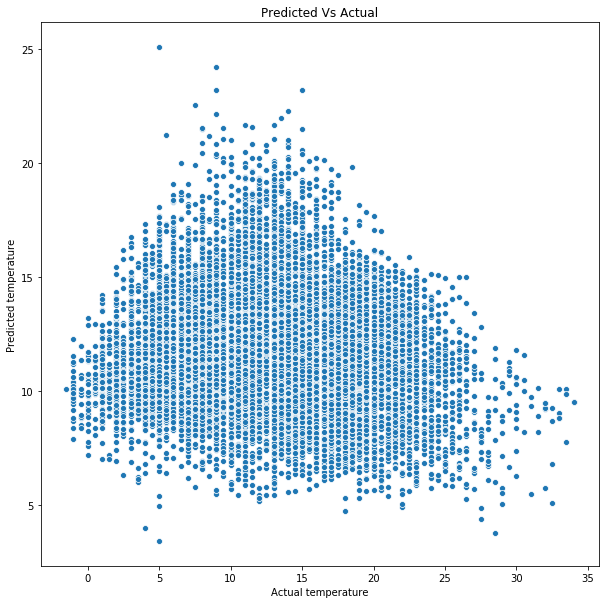

In [52]:
# q1 Plot actual versus predicted values

fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot( x=bike['t1'], y=model.fittedvalues);

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual temperature')
ax.set_ylabel('Predicted temperature');


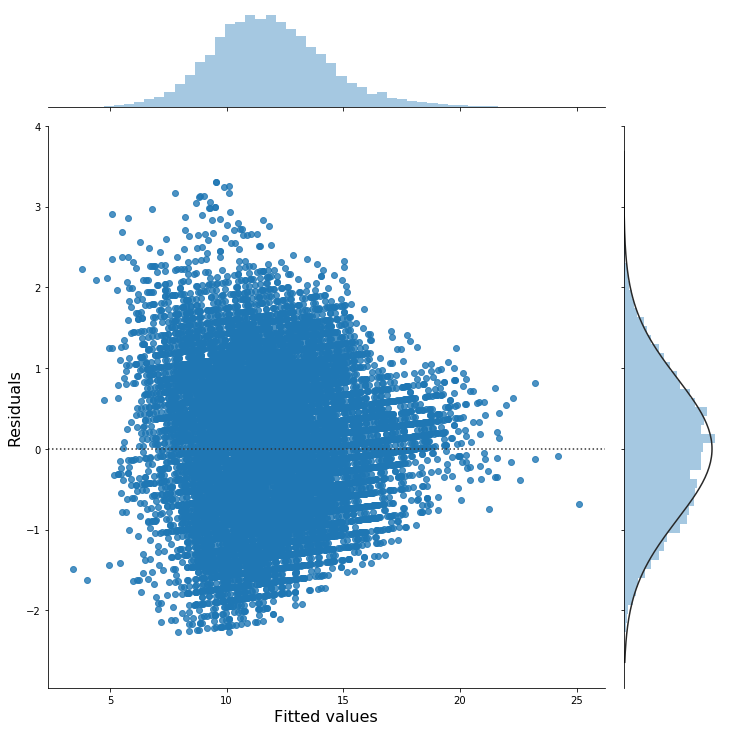

In [53]:
# q1 Plot residuals
# Plot residuals plot

g =sns.jointplot(x = model.fittedvalues, y = model.resid_pearson, kind='resid',height=10)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=16);

In [54]:
# q2: define the model
# predict temperature given the known number of bike shares

# define X and y
# note [[]] when defining more than one explanatory variables in a list
X = bike[["t2"]] # explanatory variable
y = bike["t1"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     t1   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.154e+06
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:54:06   Log-Likelihood:                -33588.
No. Observations:               17414   AIC:                         6.718e+04
Df Residuals:                   17413   BIC:                         6.718e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
t2             1.0203      0.001   1074.251      0.000       1.018       1.022
==============================================================================
Omnibus:                     2428.561   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3611.700
Skew:                           1.114   Prob(JB):                         0.00
Kurtosis:                       2.883   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

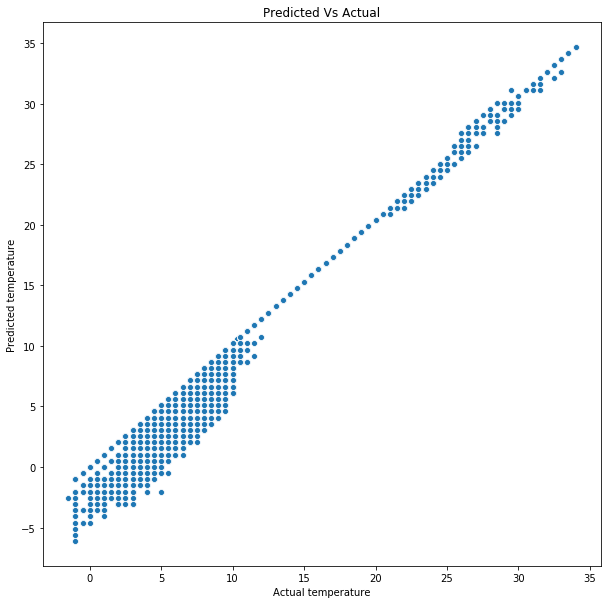

In [55]:
# q2 # q1 Plot actual versus predicted values

fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot( x=bike['t1'], y=model.fittedvalues);

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual temperature')
ax.set_ylabel('Predicted temperature');

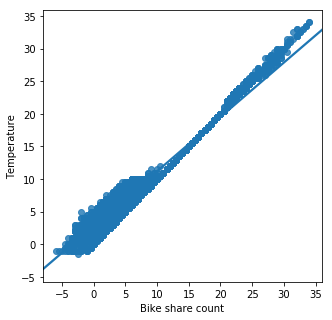

In [59]:
#q2 # define r squared
# model.rsquared: return the R^2 value
# round( ,2): rounds R^2 to 2 decimal places
r2 = round(model.rsquared,2)

# define figure size
fig, ax = plt.subplots(figsize=(5,5))

# plot regression plot 
sns.regplot(data=bike, x='t2', y='t1');

# add text lable
# text postion based on x and y axsis
# "R squared=" +str(r2) : label equated to text "R squared=" and defined rsqaured as a string
# specify fontsize

ax.set_xlabel('Bike share count')
ax.set_ylabel('Temperature');

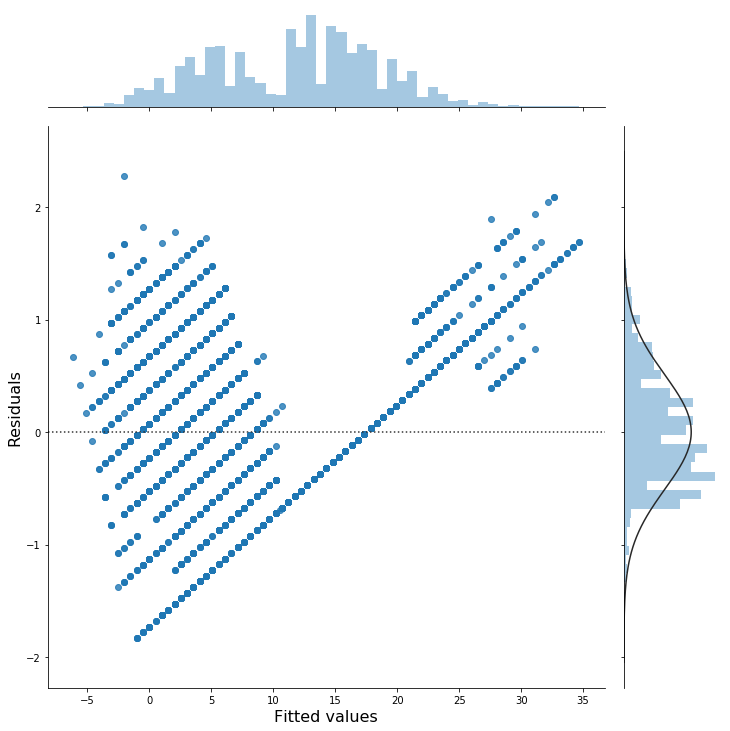

In [58]:
# q2 # Plot residuals plot

g =sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='resid',height=10)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=16);

In [61]:
# q3: # predict temperature given the known number of bike shares

# define X and y
# note [[]] when defining more than one explanatory variables in a list
X = bike_dummies[["season_0","season_1","season_2"]] # explanatory variable
y = bike_dummies["t1"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     t1   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 3.004e+04
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:02:02   Log-Likelihood:                -54380.
No. Observations:               17414   AIC:                         1.088e+05
Df Residuals:                   17411   BIC:                         1.088e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season_0      10.6667      0.083    128.664      0.000      10.504      10.829
season_1      18.4312      0.083    222.144      0.000      18.269      18.594
season_2      13.0392      0.084    155.645      0.000      12.875      13.203
==============================================================================
Omnibus:                      449.953   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.513
Skew:                           0.389   Prob(JB):                    4.10e-103
Kurtosis:                       2.790   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

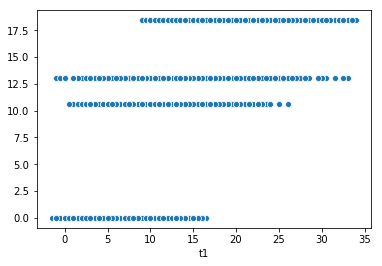

In [62]:
# q3 fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot( x=bike['t1'], y=model.fittedvalues);

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual temperature')
ax.set_ylabel('Predicted temperature');

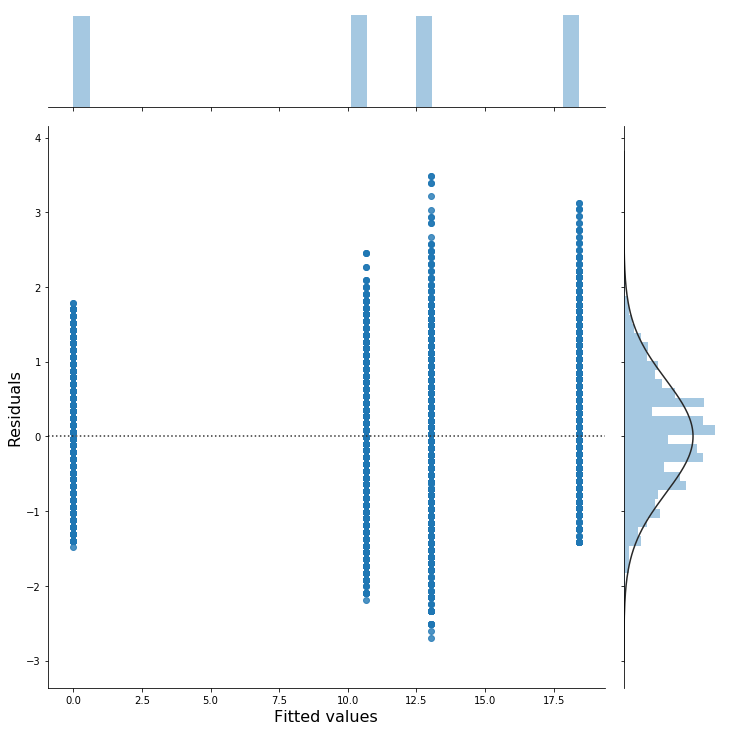

In [64]:
 g =sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='resid',height=10)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=16);

In [67]:
weather_dummies.head()


weather_1  weather_2  weather_3  weather_4  weather_7  weather_10  \
0          0          0          1          0          0           0   
1          1          0          0          0          0           0   
2          1          0          0          0          0           0   
3          1          0          0          0          0           0   
4          1          0          0          0          0           0   

   weather_26  
0           0  
1           0  
2           0  
3           0  
4           0

In [71]:

X = bike_dummies[["weather_1","weather_2","weather_3","weather_4","weather_7","weather_10","weather_26"]] # explanatory variable
y = bike_dummies["t1"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     t1   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     64.60
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           1.04e-79
Time:                        14:14:27   Log-Likelihood:                -54430.
No. Observations:               17414   AIC:                         1.089e+05
Df Residuals:                   17407   BIC:                         1.089e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weather_1     12.5895      0.070    179.125      0.000      12.452      12.727
weather_2     13.3166      0.087    153.452      0.000      13.147      13.487
weather_3     12.4946      0.092    135.086      0.000      12.313      12.676
weather_4     10.6168      0.144     73.701      0.000      10.334      10.899
weather_7     11.9390      0.119    100.228      0.000      11.706      12.173
weather_10    13.4286      1.473      9.116      0.000      10.541      16.316
weather_26     5.2250      0.712      7.343      0.000       3.830       6.620
==============================================================================
Omnibus:                      137.074   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.897
Skew:                           0.167   Prob(JB):                     7.57e-28
Kurtosis:                       2.754   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

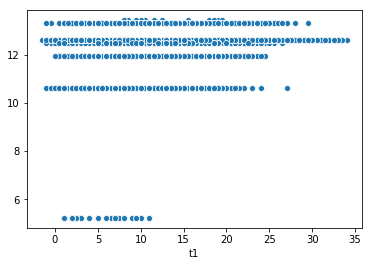

In [72]:
sns.scatterplot( x=bike['t1'], y=model.fittedvalues);

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual temperature')
ax.set_ylabel('Predicted temperature');

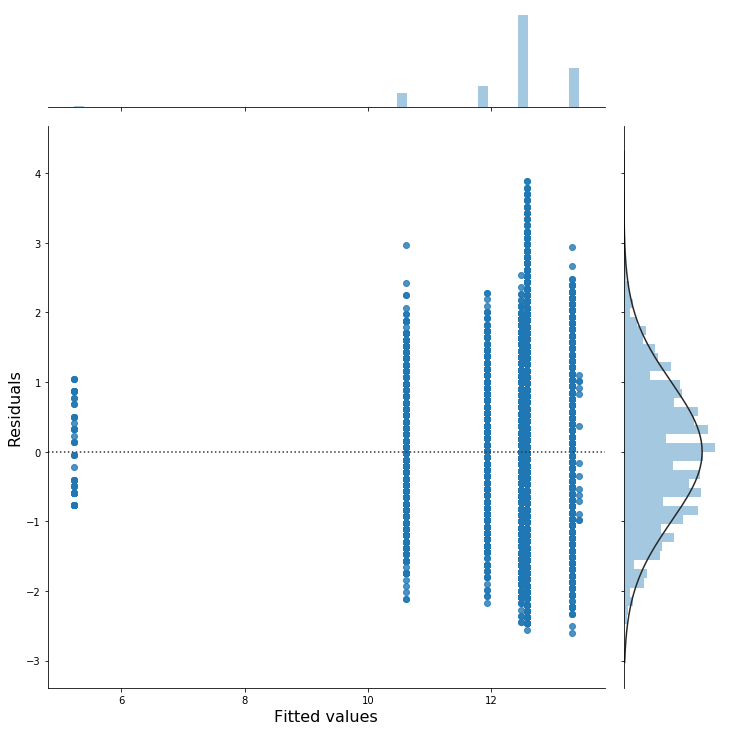

In [73]:
 g =sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='resid',height=10)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=16);

In [ ]:
#y: t1, X: hum, wind_speed, season, weather_code

In [74]:
# q5
X = bike_dummies[["hum","wind_speed","weather_1","weather_2","weather_3","weather_4","weather_7","weather_10","weather_26"]] # explanatory variable
y = bike_dummies["t1"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     t1   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     609.4
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:18:19   Log-Likelihood:                -52471.
No. Observations:               17414   AIC:                         1.050e+05
Df Residuals:                   17405   BIC:                         1.050e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hum           -0.1933      0.003    -62.792      0.000      -0.199      -0.187
wind_speed    -0.0177      0.005     -3.371      0.001      -0.028      -0.007
weather_1     25.9774      0.253    102.841      0.000      25.482      26.473
weather_2     26.5829      0.267     99.479      0.000      26.059      27.107
weather_3     27.5432      0.293     93.931      0.000      26.968      28.118
weather_4     26.3978      0.311     84.939      0.000      25.789      27.007
weather_7     28.1825      0.320     88.100      0.000      27.555      28.810
weather_10    28.2141      1.346     20.969      0.000      25.577      30.851
weather_26    22.7093      0.712     31.899      0.000      21.314      24.105
==============================================================================
Omnibus:                      656.691   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.749
Skew:                          -0.054   Prob(JB):                     9.91e-65
Kurtosis:                       2.372   Cond. No.                     2.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

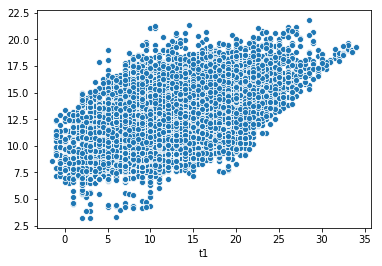

In [75]:
# q5 
sns.scatterplot( x=bike['t1'], y=model.fittedvalues);

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual temperature')
ax.set_ylabel('Predicted temperature');

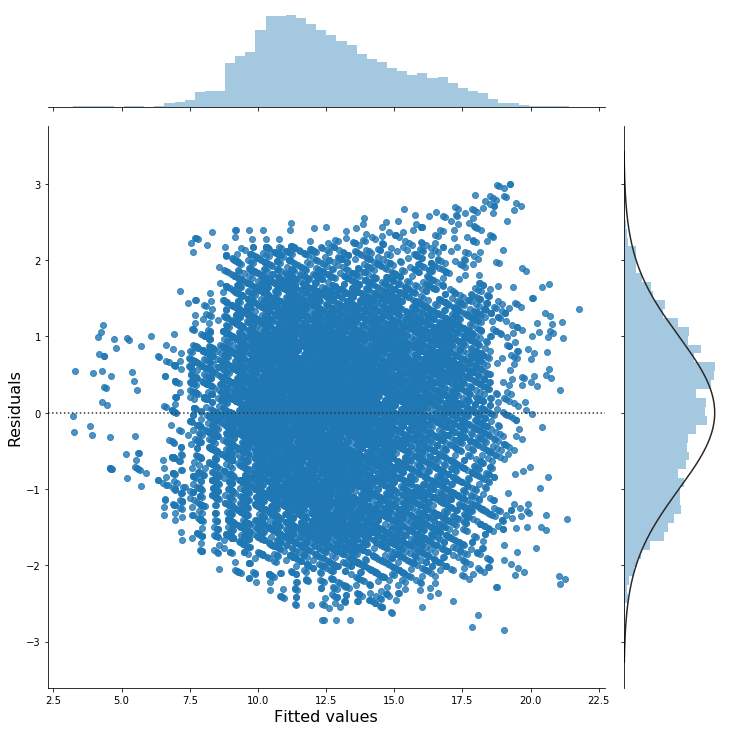

In [76]:
# q5 
g =sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='resid',height=10)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=16);

## Fitting a Generalsied Linear Model  (GLM)

### Predicting bike share use <a class='tocSkip' >
To predict bike share use ('cnt') we need to use a poisson generalsied linear model as it is a count outcome.
<br> <font color='orchid'> <b>Run the code below </b></font>

<font color='orchid'> <b>Run the code below </b></font>

In [77]:
# Fit the model

# Define the model equation using formual
# use C() to denote categorical variables
model2 = smf.glm(formula = "cnt ~ t1 + C(season) + hum + wind_speed ",\
                #specify data source
                data=bike,\
                # specify poisson transformation
                family=sm.families.Poisson()).fit()

# Print out the summary statistics of the model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    cnt   No. Observations:                17414
Model:                            GLM   Df Residuals:                    17407
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.2959e+06
Date:                Fri, 15 Sep 2023   Deviance:                   1.2448e+07
Time:                        14:22:36   Pearson chi2:                 1.49e+07
No. Iterations:                     5   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.9865      0.002   4401.633      0.000       7.983       7.990
C(season)[T.1]    -0.0575      0.001    -75.288      0.000      -0.059      -0.056
C(season)[T.2]     0.1641      0.001    236.462      0.000       0.163       0.165
C(season)[T.3]     0.0826      0.001    111.272      0.000       0.081       0.084
t1                 0.0391   6.23e-05    628.373      0.000       0.039       0.039
hum               -0.0220   1.83e-05  -1200.614      0.000      -0.022      -0.022
wind_speed         0.0005   2.99e-05     17.016      0.000       0.000       0.001
==================================================================================
"""

Play arround with different variables in the model and see how they affect the model fit. (Don't forget to use<code>C()</code> for categorical variables).

<font color='orchid'> <b>Experiment with the model variables below </font> <br> 

## Test and training data

Using test and train datasets is a good way to make sure your model isn't overfitting to the data you have. <br>
<font color='orchid'> <b>Run the code below to create your own test and train datasets</b></font>

In [78]:
# you can also create test and train datasets
# randomly select 80% of bike rows
mask =np.random.rand(len(bike))<0.8
# create train dataset with 80% of data
bike_train = bike[mask]
# create train dataset with remaining 20% of data
bike_test = bike[~mask]
# print leght of each dataset
print('Training data set length='+str(len(bike_train)))
print('Testing data set length='+str(len(bike_test)))

Training data set length=13846
Testing data set length=3568


Try using the <code>bike_train</code> to fit the model. Then evaluate the model using the test data. <br>
<font color='orchid'><b> Run the code below </font>

In [79]:
# Define the model equation using formual
# use C() to denote categorical variables
model3 = smf.glm(formula = "cnt ~ t1 + C(season) + hum + wind_speed ",\
                #specify data source
                data=bike_train,\
                # specify poisson transformation
                family=sm.families.Poisson()).fit()
predicted = model3.predict(bike_test)
# Print out the summary statistics of the model
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    cnt   No. Observations:                13846
Model:                            GLM   Df Residuals:                    13839
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.0691e+06
Date:                Fri, 15 Sep 2023   Deviance:                   1.0024e+07
Time:                        14:25:34   Pearson chi2:                 1.20e+07
No. Iterations:                     5   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.0181      0.002   3950.348      0.000       8.014       8.022
C(season)[T.1]    -0.0555      0.001    -64.828      0.000      -0.057      -0.054
C(season)[T.2]     0.1603      0.001    207.001      0.000       0.159       0.162
C(season)[T.3]     0.0802      0.001     96.211      0.000       0.079       0.082
t1                 0.0384   6.98e-05    550.523      0.000       0.038       0.039
hum               -0.0222   2.05e-05  -1082.733      0.000      -0.022      -0.022
wind_speed         0.0003   3.36e-05      7.811      0.000       0.000       0.000
==================================================================================
"""

<font color='orchid'><b> Run the code below to see the predicted values from test dataset versus the actual test dataset bike share count </font>

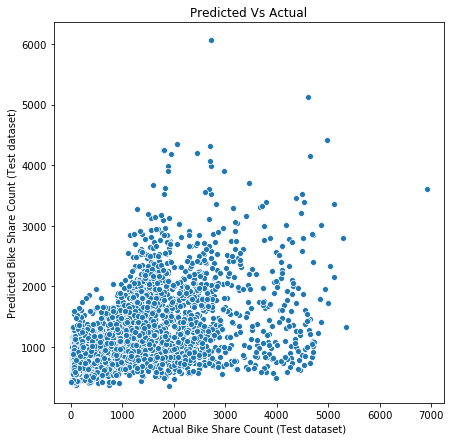

In [80]:
fig, ax = plt.subplots(figsize=(7,7))

ax = sns.scatterplot(x=bike_test['cnt'], y=predicted)

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual Bike Share Count (Test dataset)')
ax.set_ylabel('Predicted Bike Share Count (Test dataset)');

Practice adding a markdown cell

## Exercise 4 Answers
### 4.2.1 <a class="tocSkip"> </i>
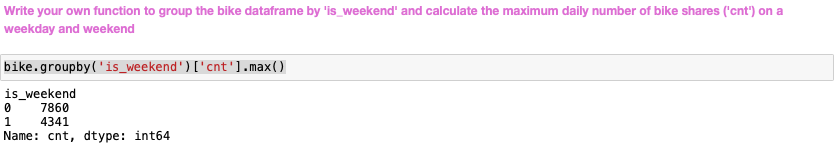
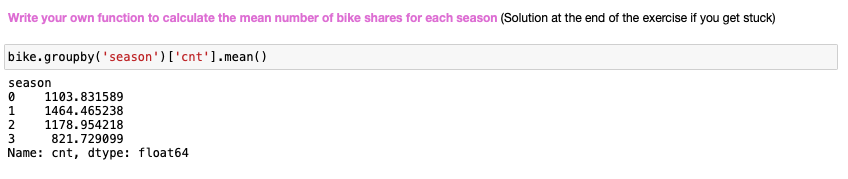
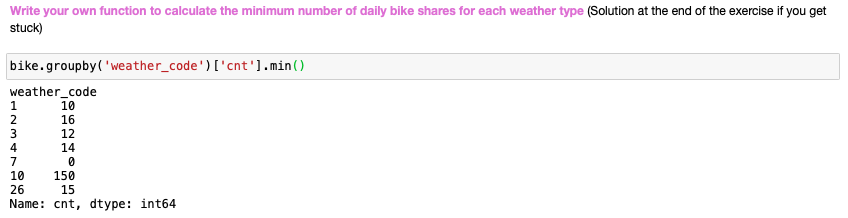

<a id='file_paths'></a>
# File Paths

A file path identifies the exact unique location of a file or folder in a file system.
<br>E.g. I created this notebook in the following folders.<br>
* F: (USB)
    * 2019_20 (Folder)
        * Data_Science (Folder)
            * Intro_to_Python (Folder)
                * Intro_to_Python.ipyn (the Jupyter Notebook file)<br>

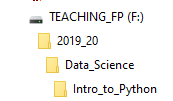


Resulting in the file path:"F:\2019_20\Data_Science\Intro_to_Python\Intro to Python.ipynb"



# FAQs 

## Why do some functions have parentheses and others do not? <a class="tocSkip">

Parentheses indicate the difference between methods versus attibutes

### Attributes: <a class="tocSkip">
- do not have parenthesis () 
- are values assocaited with an object e.g. <code> <font color='blue'>dataframe</font>.shape, <font color='blue'>dataframe</font>.column, <font color='blue'>dataframe</font>.dtypes </code> these are all attrributes of the dataframe (object) they are appliead to. 

### Methods: <a class="tocSkip">
- do have partnethesis () 
- are functions assocaited with particular objects. E.g. <code> <font color='blue'>dataframe</font>.head(), <font color='blue'>dataframe</font>["<font color='blue'>column</font>"].mean() </code> 